In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from datetime import datetime

#Importamos excel de datos
datos = pd.read_excel("bdd/Datos.xlsx")
#Ver tabla de datos
datos

,Paciente,Archivo audio,F0,F1,F2,F3,F4,Intensidad Media,Jitter,Shimmer %,...,F4 H,Intensidad Media H,Jitter H,Shimmer % H,Shimmer dB H,HNR H,NHR H,Año Nacimiento,Género,hora Audio
0,Paciente 1,paciente1_031213_a_inicial.wav,245.5806,907.7364,1339.335,2480.677,3351.738,61.60275,0.00167,0.02444,...,3909.4,61.52,0.00132,0.02386,0.212,23.450,0.006,1950,H,9
1,Paciente 1,paciente1_101213_a_inicial.wav,247.3738,931.6043,1446.955,2987.819,3934.737,61.23921,0.00087,0.01790,...,3909.2,62.14,0.00084,0.01774,0.166,22.319,0.006,1950,H,10
2,Paciente 1,paciente1_261113_a_inicial.wav,231.7177,903.4441,1421.086,2219.380,3145.451,62.57379,0.00172,0.02810,...,3863.8,63.03,0.00155,0.02773,0.245,21.926,0.007,1950,H,16
3,Paciente 1,paciente1_291013_a_inicial.wav,187.9446,948.6999,1411.848,2779.616,3981.109,52.85140,0.00191,0.04533,...,4322.4,52.74,0.00171,0.04522,0.394,18.524,0.010,1950,H,17
4,Paciente 2,paciente2_20161026_a_inicio_tratamiento.wav,196.5170,903.2843,1523.655,2865.747,3865.009,42.02604,0.00312,0.05152,...,4188.7,41.80,0.00311,0.05153,0.458,15.221,0.040,1955,M,9
5,Paciente 2,paciente2_20161110_a_inicial.wav,234.2865,851.6474,1481.379,3063.509,4004.121,66.22817,0.00150,0.04957,...,4045.7,66.24,0.00144,0.04946,0.444,19.884,0.010,1955,M,10
6,Paciente 2,paciente2_20161124_a_inicial.wav,224.0942,809.7131,1457.666,2528.042,3708.387,52.33086,0.00131,0.03081,...,4032.1,52.35,0.00128,0.03058,0.270,20.871,0.008,1955,M,16
7,Paciente 2,paciente2_20161215_a_inicial.wav,242.4933,854.2600,1513.880,2817.667,3890.656,59.83406,0.00111,0.02511,...,3972.6,59.86,0.00187,0.02504,0.221,23.940,0.004,1955,M,17
8,Paciente 3,paciente3_20180423_a_inicial.wav,182.2624,1012.8400,1479.304,3087.809,4551.156,51.43210,0.00477,0.03982,...,4553.9,51.73,0.00461,0.03894,0.435,17.357,0.025,1945,H,9
9,Paciente 3,paciente3_20180514_a_inicial.wav,187.0913,1033.7970,1491.517,2833.847,4202.102,60.89441,0.00321,0.04201,...,4376.1,61.11,0.00311,0.04154,0.402,17.607,0.041,1945,H,10


In [2]:

datos = datos.rename(columns={'Archivo audio':'Archivo_audio','Intensidad Media': 'Intensidad_Media' , 'Shimmer %': 'Shimmer%' , 'Shimmer dB': 'ShimmerdB'
                             , 'F0 H': 'F0_H', 'F1 H': 'F1_H', 'F2 H': 'F2_H', 'F3 H': 'F3_H', 'F4 H': 'F4_H', 'Intensidad Media H': 'Intensidad_Media_H', 
                              'Jitter H': 'Jitter_H', 'Shimmer % H': 'Shimmer%_H', 'Shimmer dB H': 'ShimmerdB_H', 'HNR H': 'HNR_H',
                              'NHR H': 'NHR_H', 'Año Nacimiento': 'Año_Nacimiento', 'hora  Audio': 'hora_Audio'})

In [3]:
print(datos.columns)

Index(['Paciente', 'Archivo_audio', 'F0', 'F1', 'F2', 'F3', 'F4',
       'Intensidad_Media', 'Jitter', 'Shimmer%', 'ShimmerdB', 'HNR', 'NHR',
       'F0_H', 'F1_H', 'F2_H', 'F3_H', 'F4_H', 'Intensidad_Media_H',
       'Jitter_H', 'Shimmer%_H', 'ShimmerdB_H', 'HNR_H', 'NHR_H',
       'Año_Nacimiento', 'Género', 'hora_Audio'],
      dtype='object')


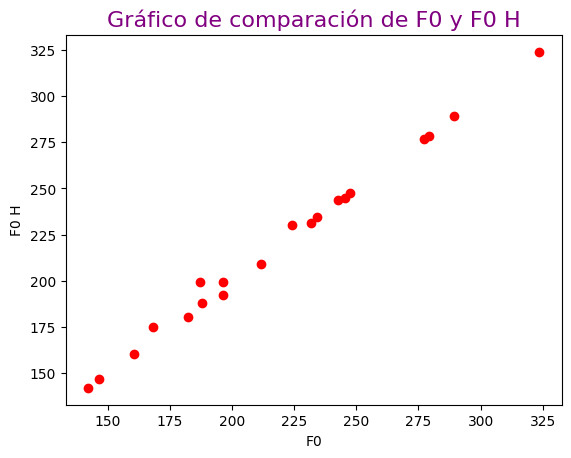

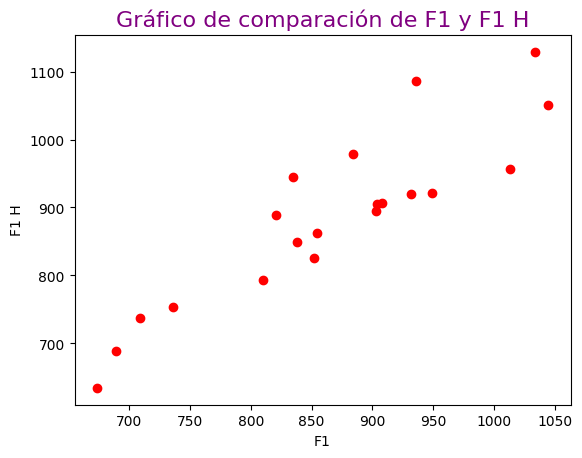

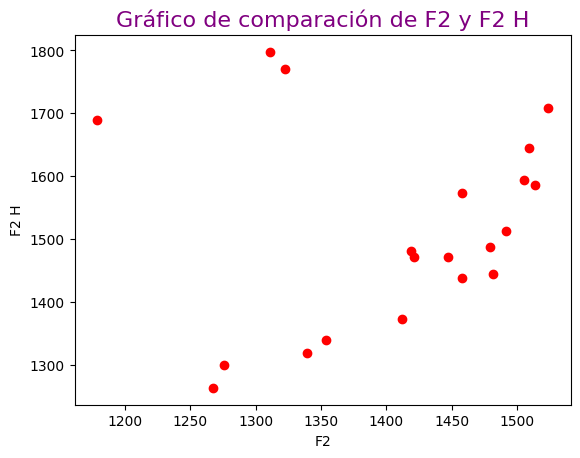

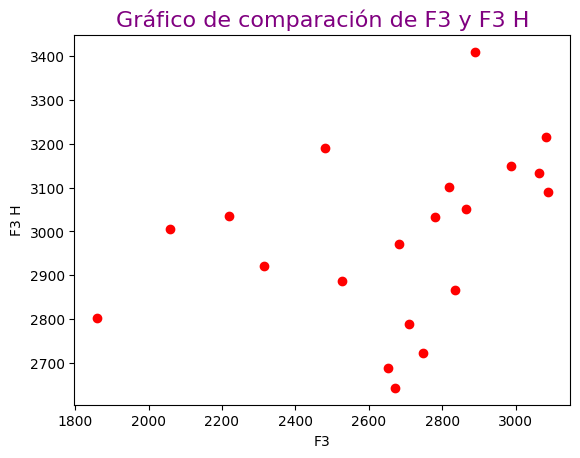

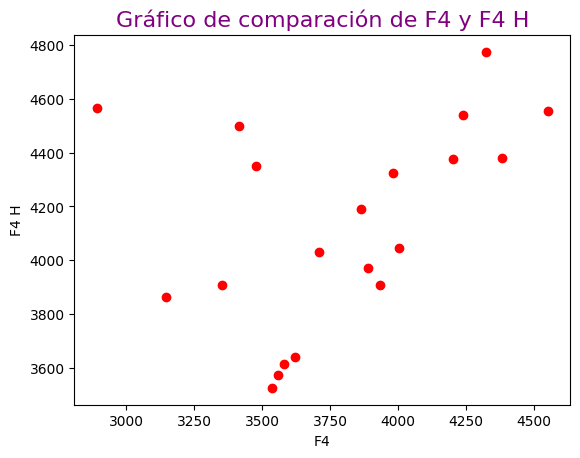

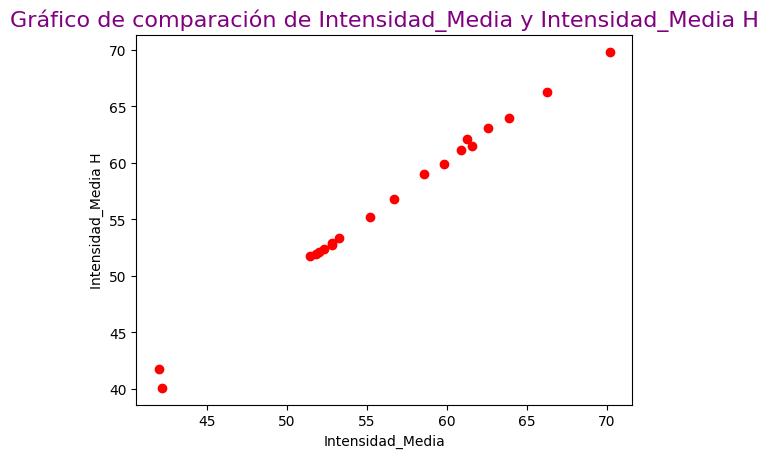

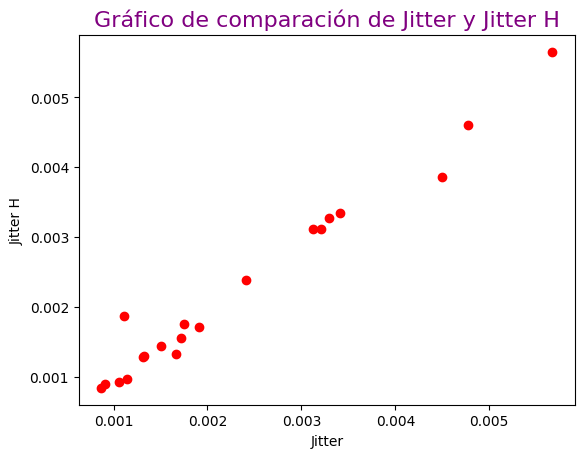

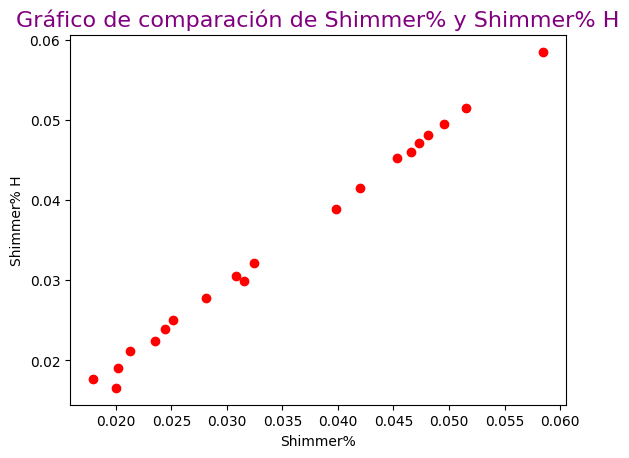

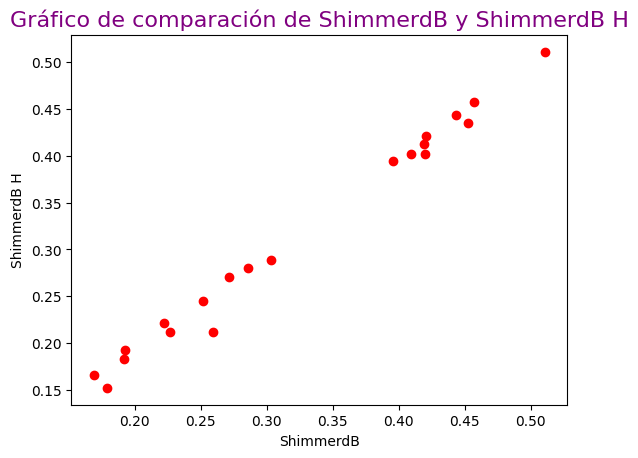

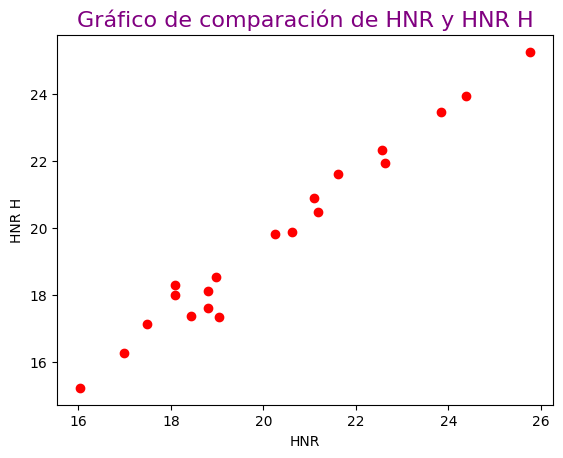

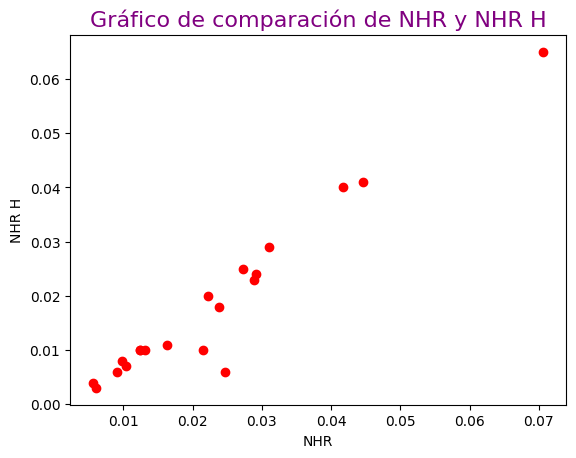

In [4]:
variables = ["F0", "F1", "F2", "F3", "F4", "Intensidad_Media", "Jitter", "Shimmer%", "ShimmerdB", "HNR", "NHR"]

for variable in variables:
    fig, ax = plt.subplots()
    ax.scatter(datos[variable], datos[f'{variable}_H'], c= "red")

    ax.set_xlabel(variable)
    ax.set_ylabel(f'{variable} H')

    plt.title(f"Gráfico de comparación de {variable} y {variable} H", fontsize=16, color="purple")

    file_name = f'grafico_comparacion_{variable}_{variable}H.png'
    #file_path = f'graficos/deepnote_analisis/dispersion_hvm/{file_name}'
    file_path = f'../../media/graficos/deepnote_analisis/dispersion_hvm/{file_name}'

    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    
    plt.show()

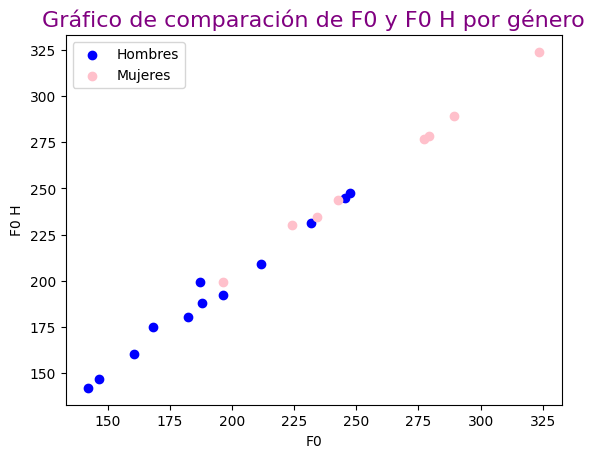

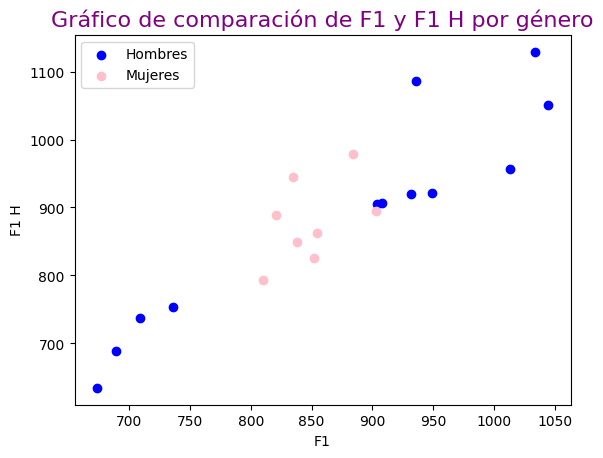

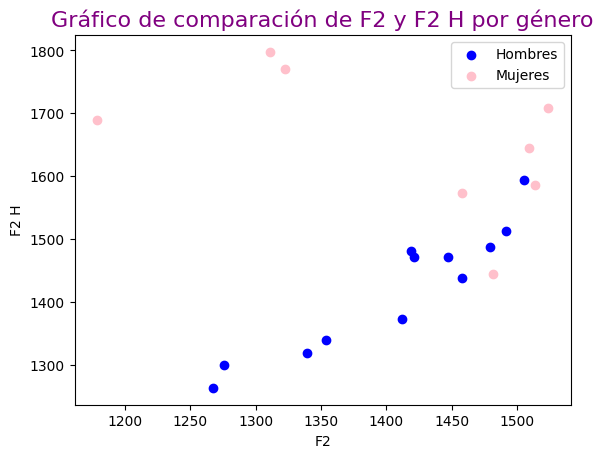

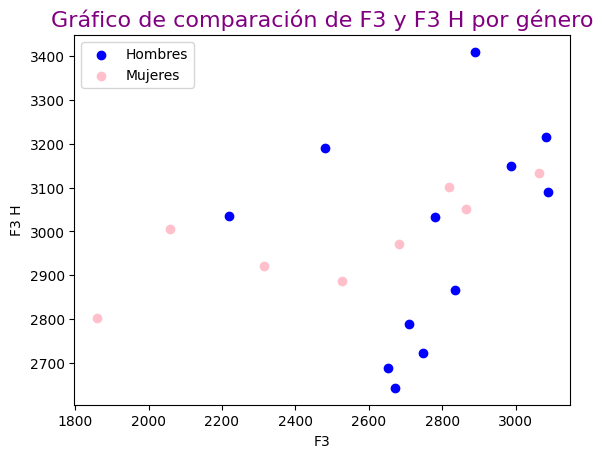

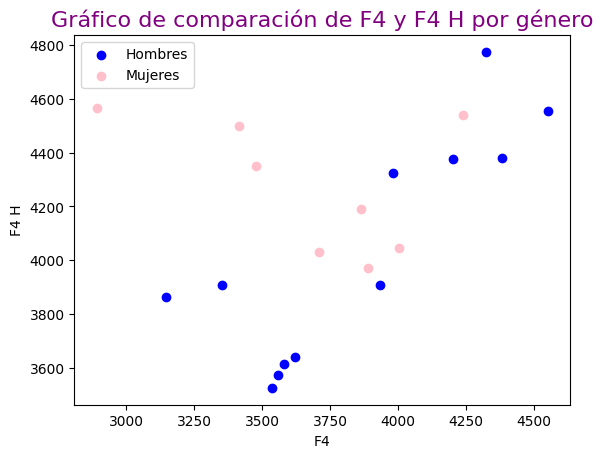

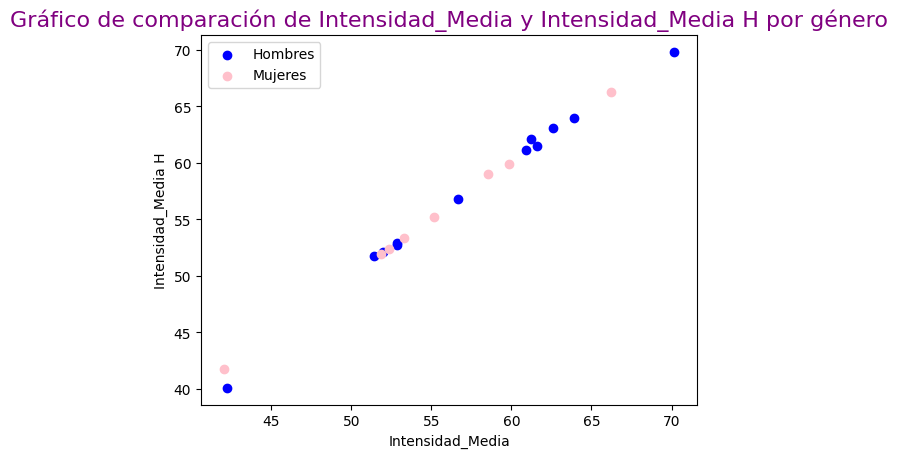

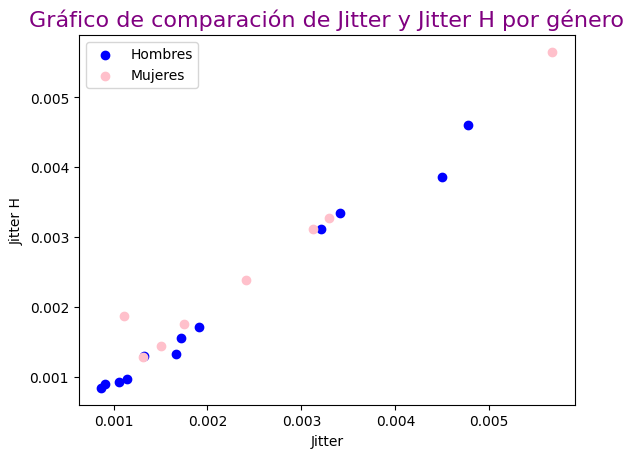

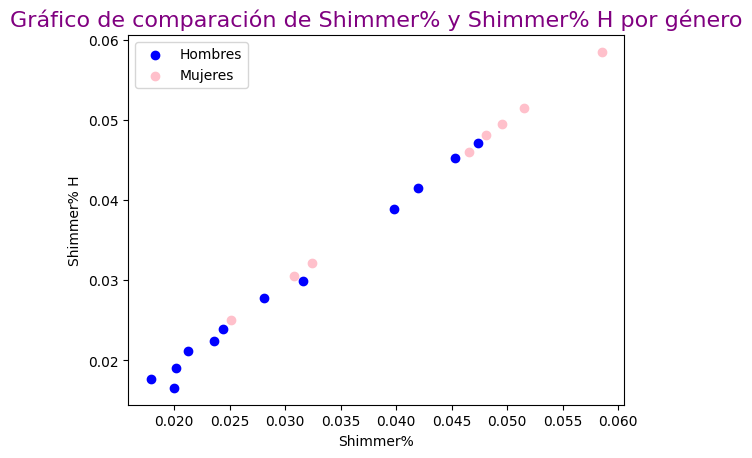

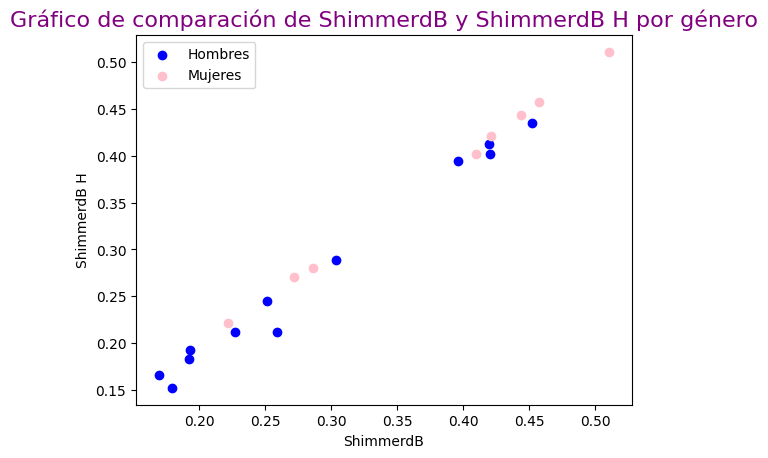

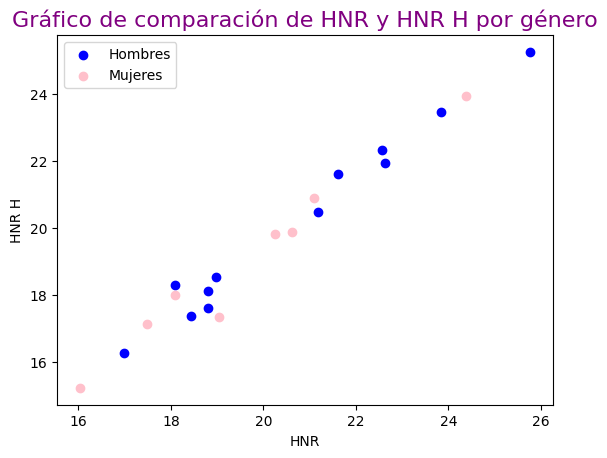

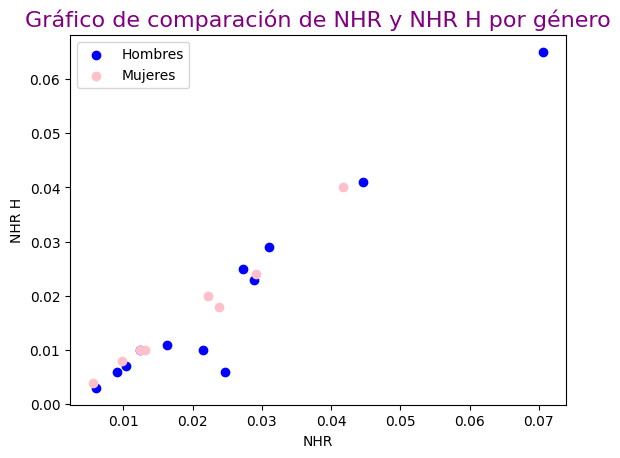

In [5]:
datos_hombres = datos[datos['Género'] == 'H']
datos_mujeres = datos[datos['Género'] == 'M']

variables = ["F0", "F1", "F2", "F3", "F4", "Intensidad_Media", "Jitter", "Shimmer%", "ShimmerdB", "HNR", "NHR"]

for variable in variables:
    fig, ax = plt.subplots()
    ax.scatter(datos_hombres[variable], datos_hombres[f'{variable}_H'], c="blue", label='Hombres')
    ax.scatter(datos_mujeres[variable], datos_mujeres[f'{variable}_H'], c="pink", label='Mujeres')

    ax.set_xlabel(variable)
    ax.set_ylabel(f'{variable} H')

    plt.title(f"Gráfico de comparación de {variable} y {variable} H por género", fontsize=16, color="purple")

    plt.legend()

    file_name = f'grafico_comparacion_generos_{variable}_{variable}H.png'
    #file_path = f'graficos/deepnote_analisis/dispersion_hvm_generos/{file_name}'
    file_path = f'../../media/graficos/deepnote_analisis/dispersion_hvm_generos/{file_name}'

    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')

    
    plt.show()

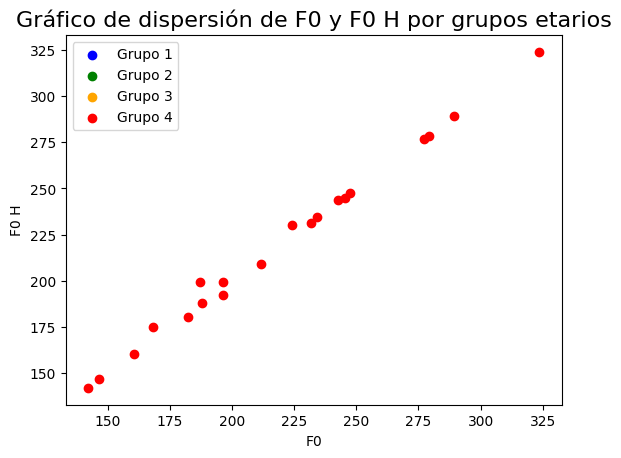

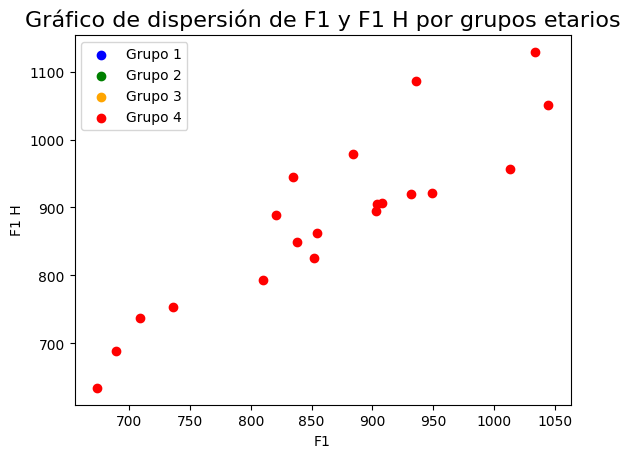

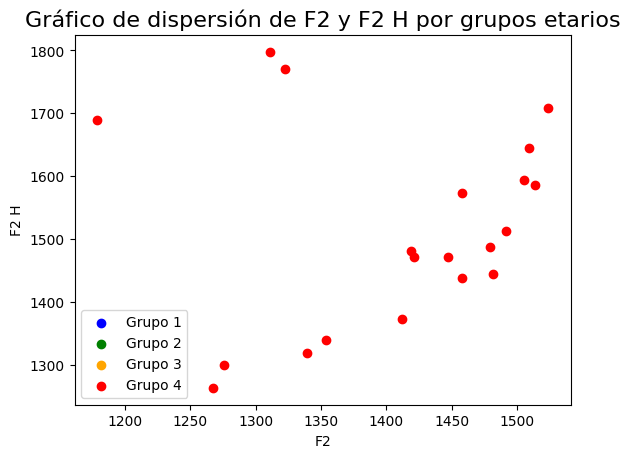

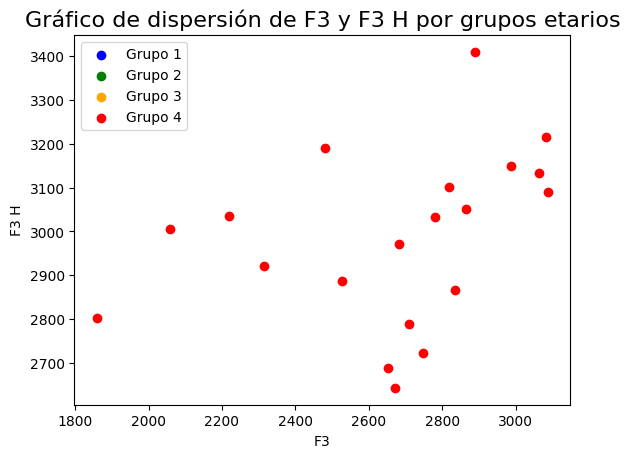

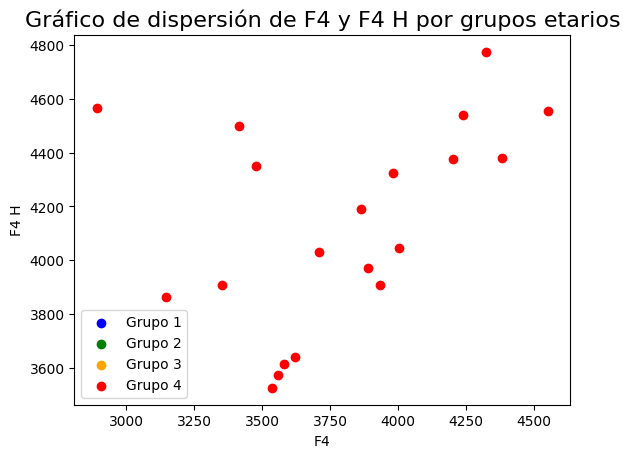

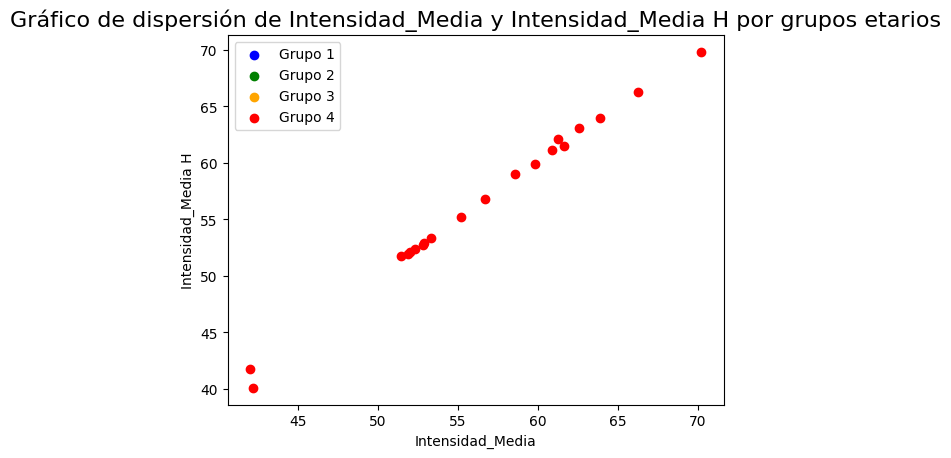

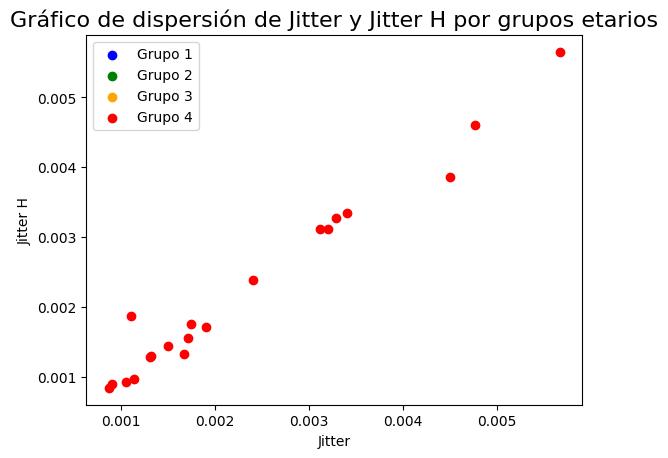

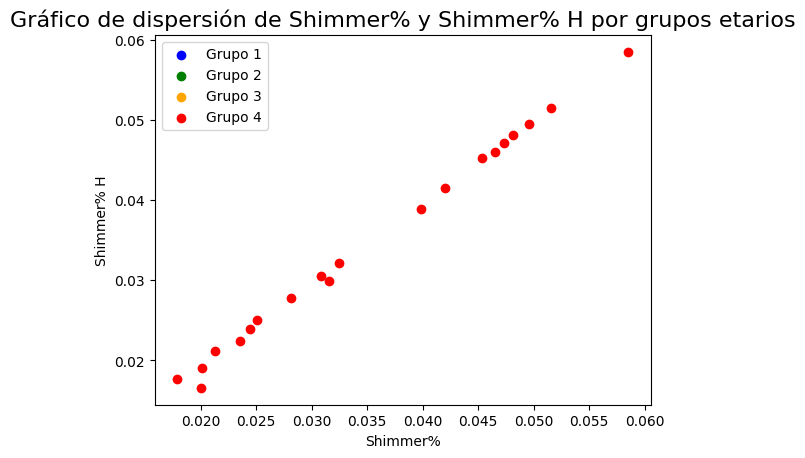

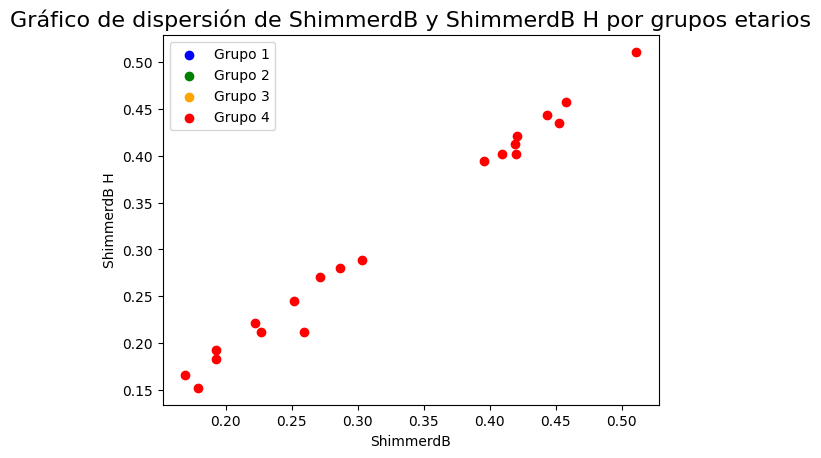

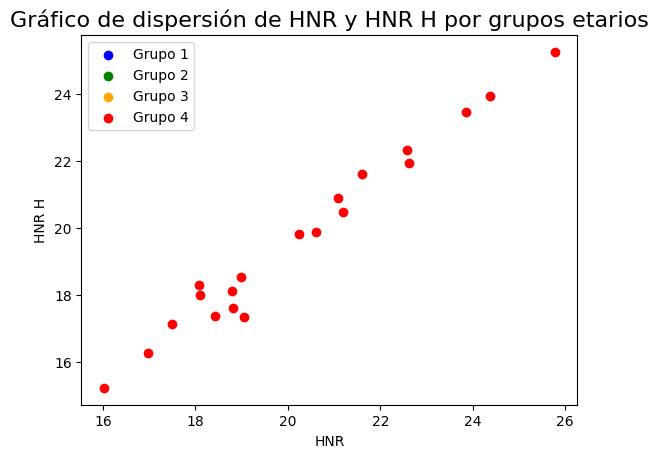

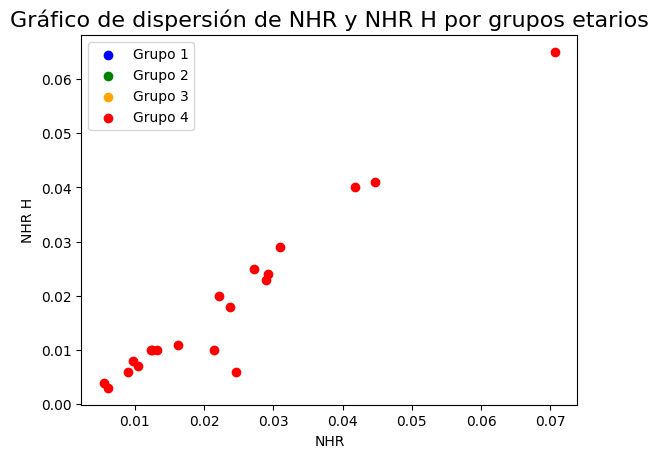

In [6]:
año_actual = datetime.now().year
datos['edad'] = año_actual - datos['Año_Nacimiento']
bins = [0, 18, 35, 59, 90]
labels = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4']
datos['grupo_etario'] = pd.cut(datos['edad'], bins=bins, labels=labels)

variables = ["F0", "F1", "F2", "F3", "F4", "Intensidad_Media", "Jitter", "Shimmer%", "ShimmerdB", "HNR", "NHR"]

for variable in variables:
    fig, ax = plt.subplots()

    for grupo, color in zip(labels, ['blue', 'green', 'orange', 'red']):
        grupo_datos = datos[datos['grupo_etario'] == grupo]
        ax.scatter(grupo_datos[variable], grupo_datos[f'{variable}_H'], label=grupo, c=color)

    ax.set_xlabel(variable)
    ax.set_ylabel(f'{variable} H')

    plt.legend()

    plt.title(f"Gráfico de dispersión de {variable} y {variable} H por grupos etarios", fontsize=16)

    file_name = f'grafico_comparacion_edad_{variable}_{variable}H.png'
    #file_path = f'graficos/deepnote_analisis/dispersion_hvm_edad/{file_name}'
    file_path = f'../../media/graficos/deepnote_analisis/dispersion_hvm_edad/{file_name}'
    
    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')

    plt.show()

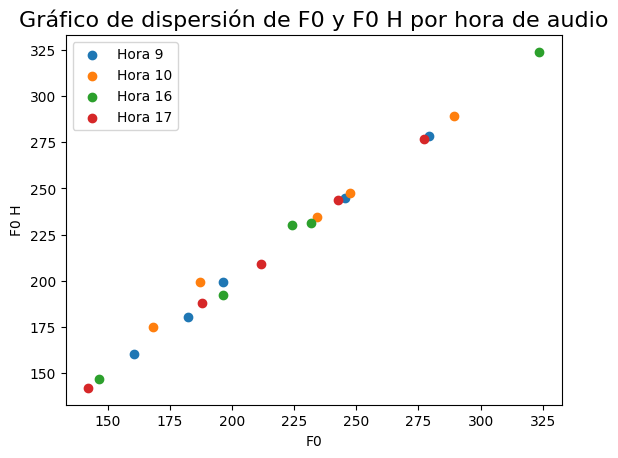

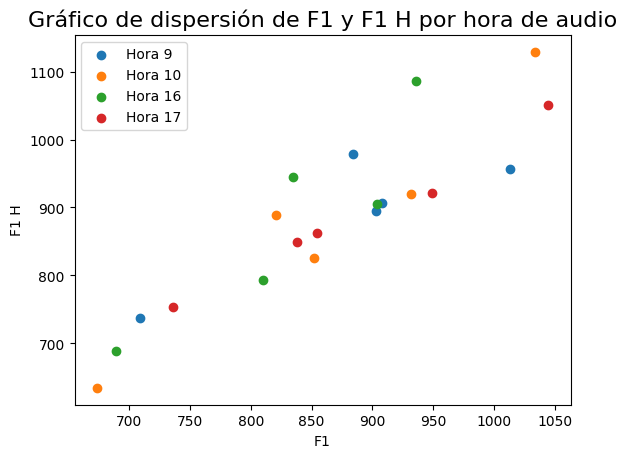

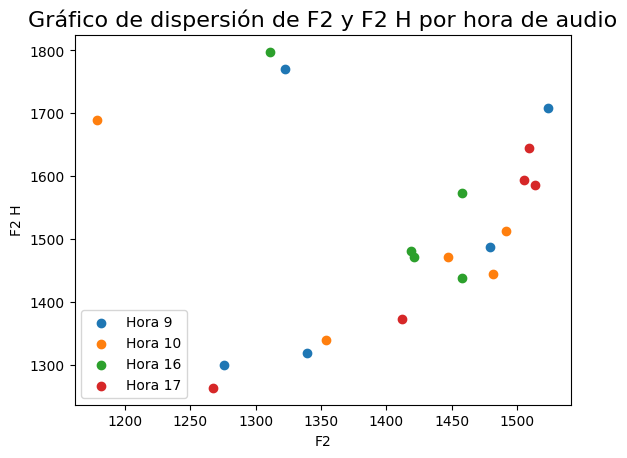

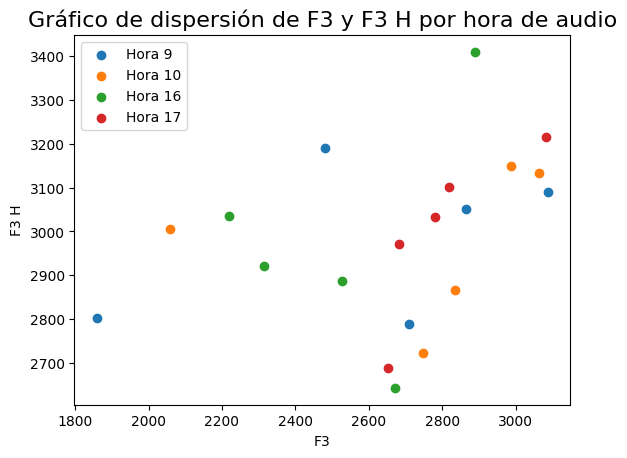

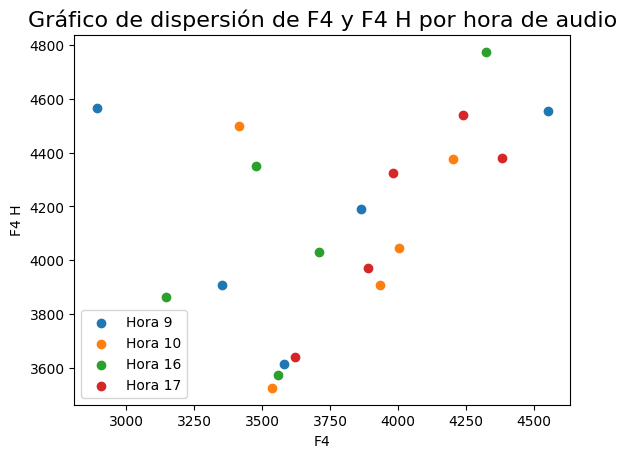

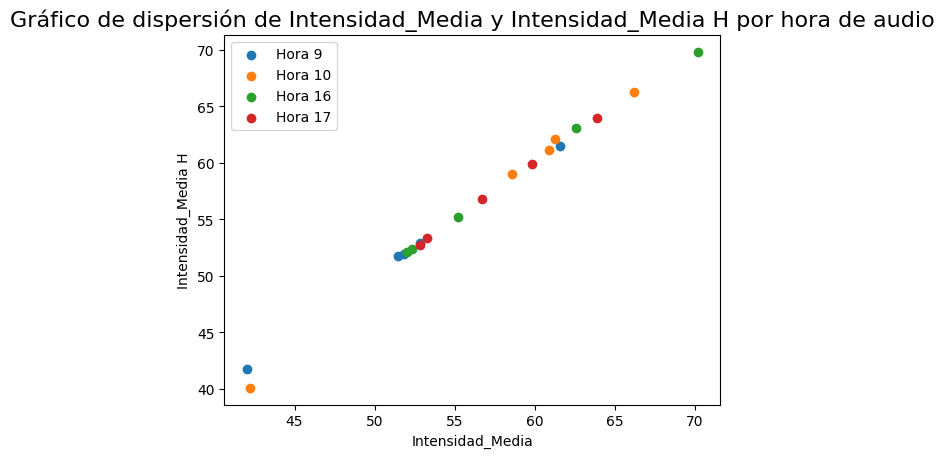

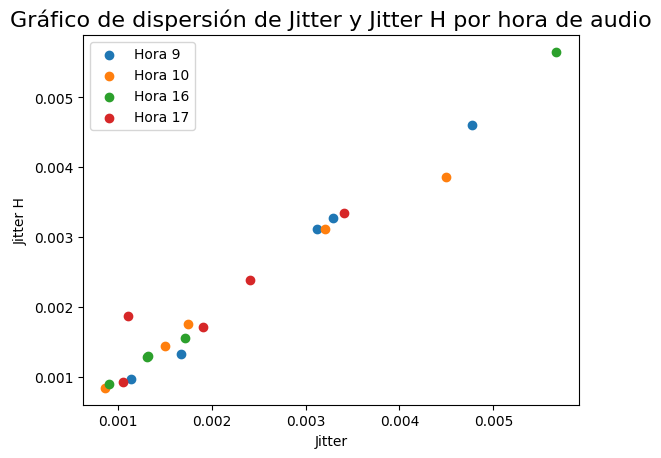

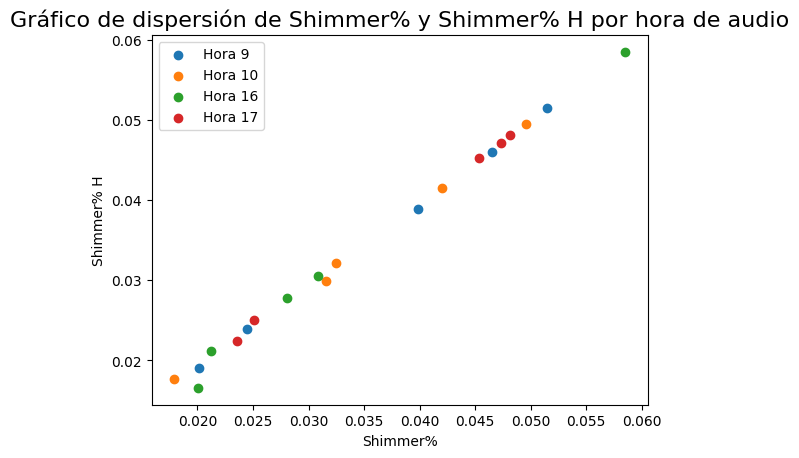

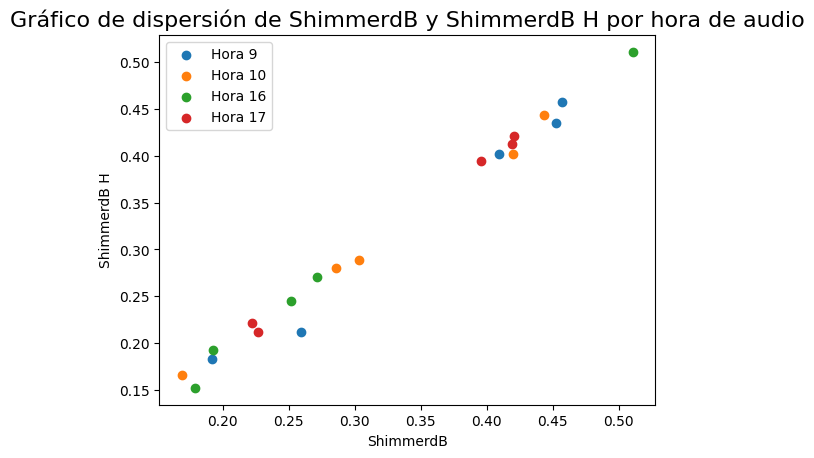

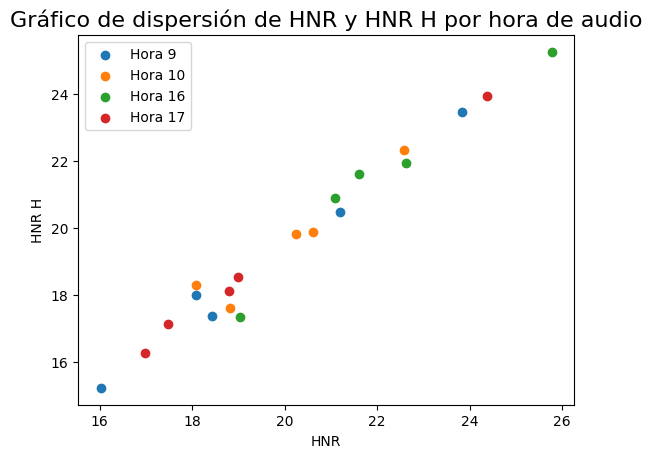

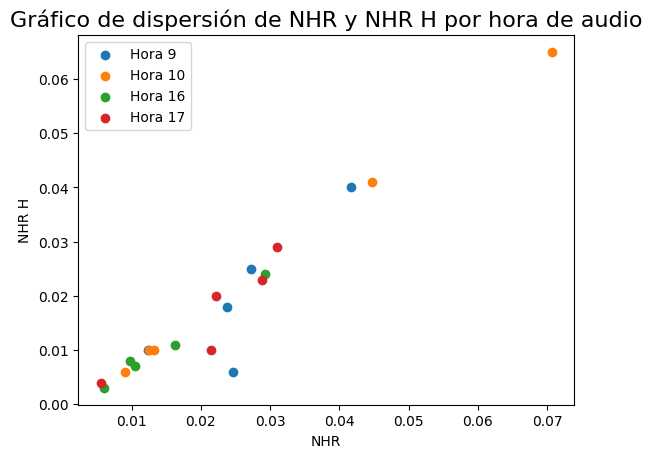

In [7]:
for variable in variables:
    fig, ax = plt.subplots()

    horas_unicas = datos['hora_Audio'].unique()
    
    for hora in horas_unicas:
        hora_datos = datos[datos['hora_Audio'] == hora]
        ax.scatter(hora_datos[variable], hora_datos[f'{variable}_H'], label=f'Hora {hora}')

    ax.set_xlabel(variable)
    ax.set_ylabel(f'{variable} H')

    plt.legend()

    plt.title(f"Gráfico de dispersión de {variable} y {variable} H por hora de audio", fontsize=16)

    file_name = f'grafico_comparacion_hr_grabacion_{variable}_{variable}H.png'
    #file_path = f'graficos/deepnote_analisis/dispersion_hvm_hr_grabacion/{file_name}'
    file_path = f'../../media/graficos/deepnote_analisis/dispersion_hvm_hr_grabacion/{file_name}'
    
    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    
    plt.show()

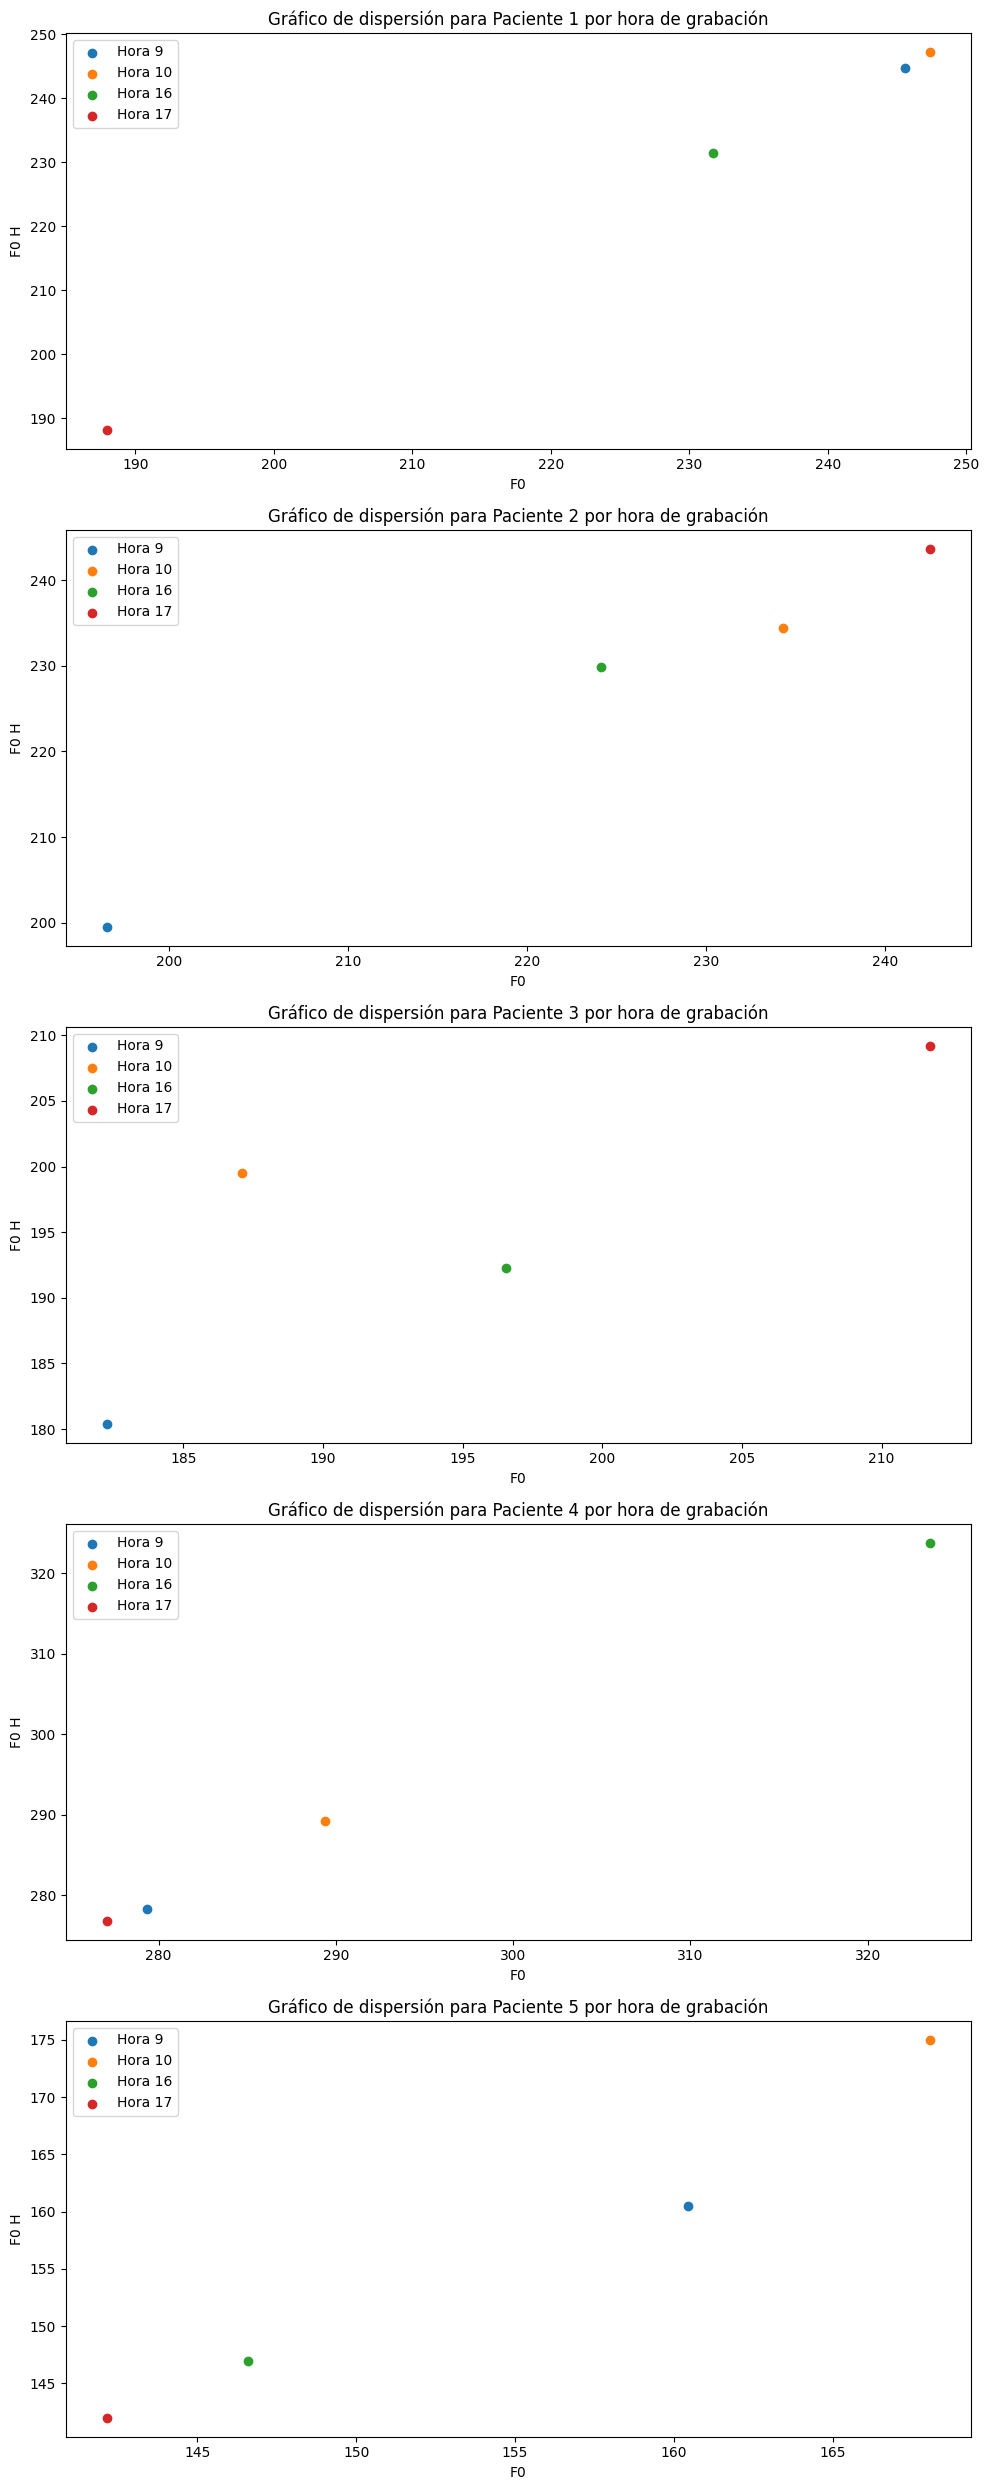

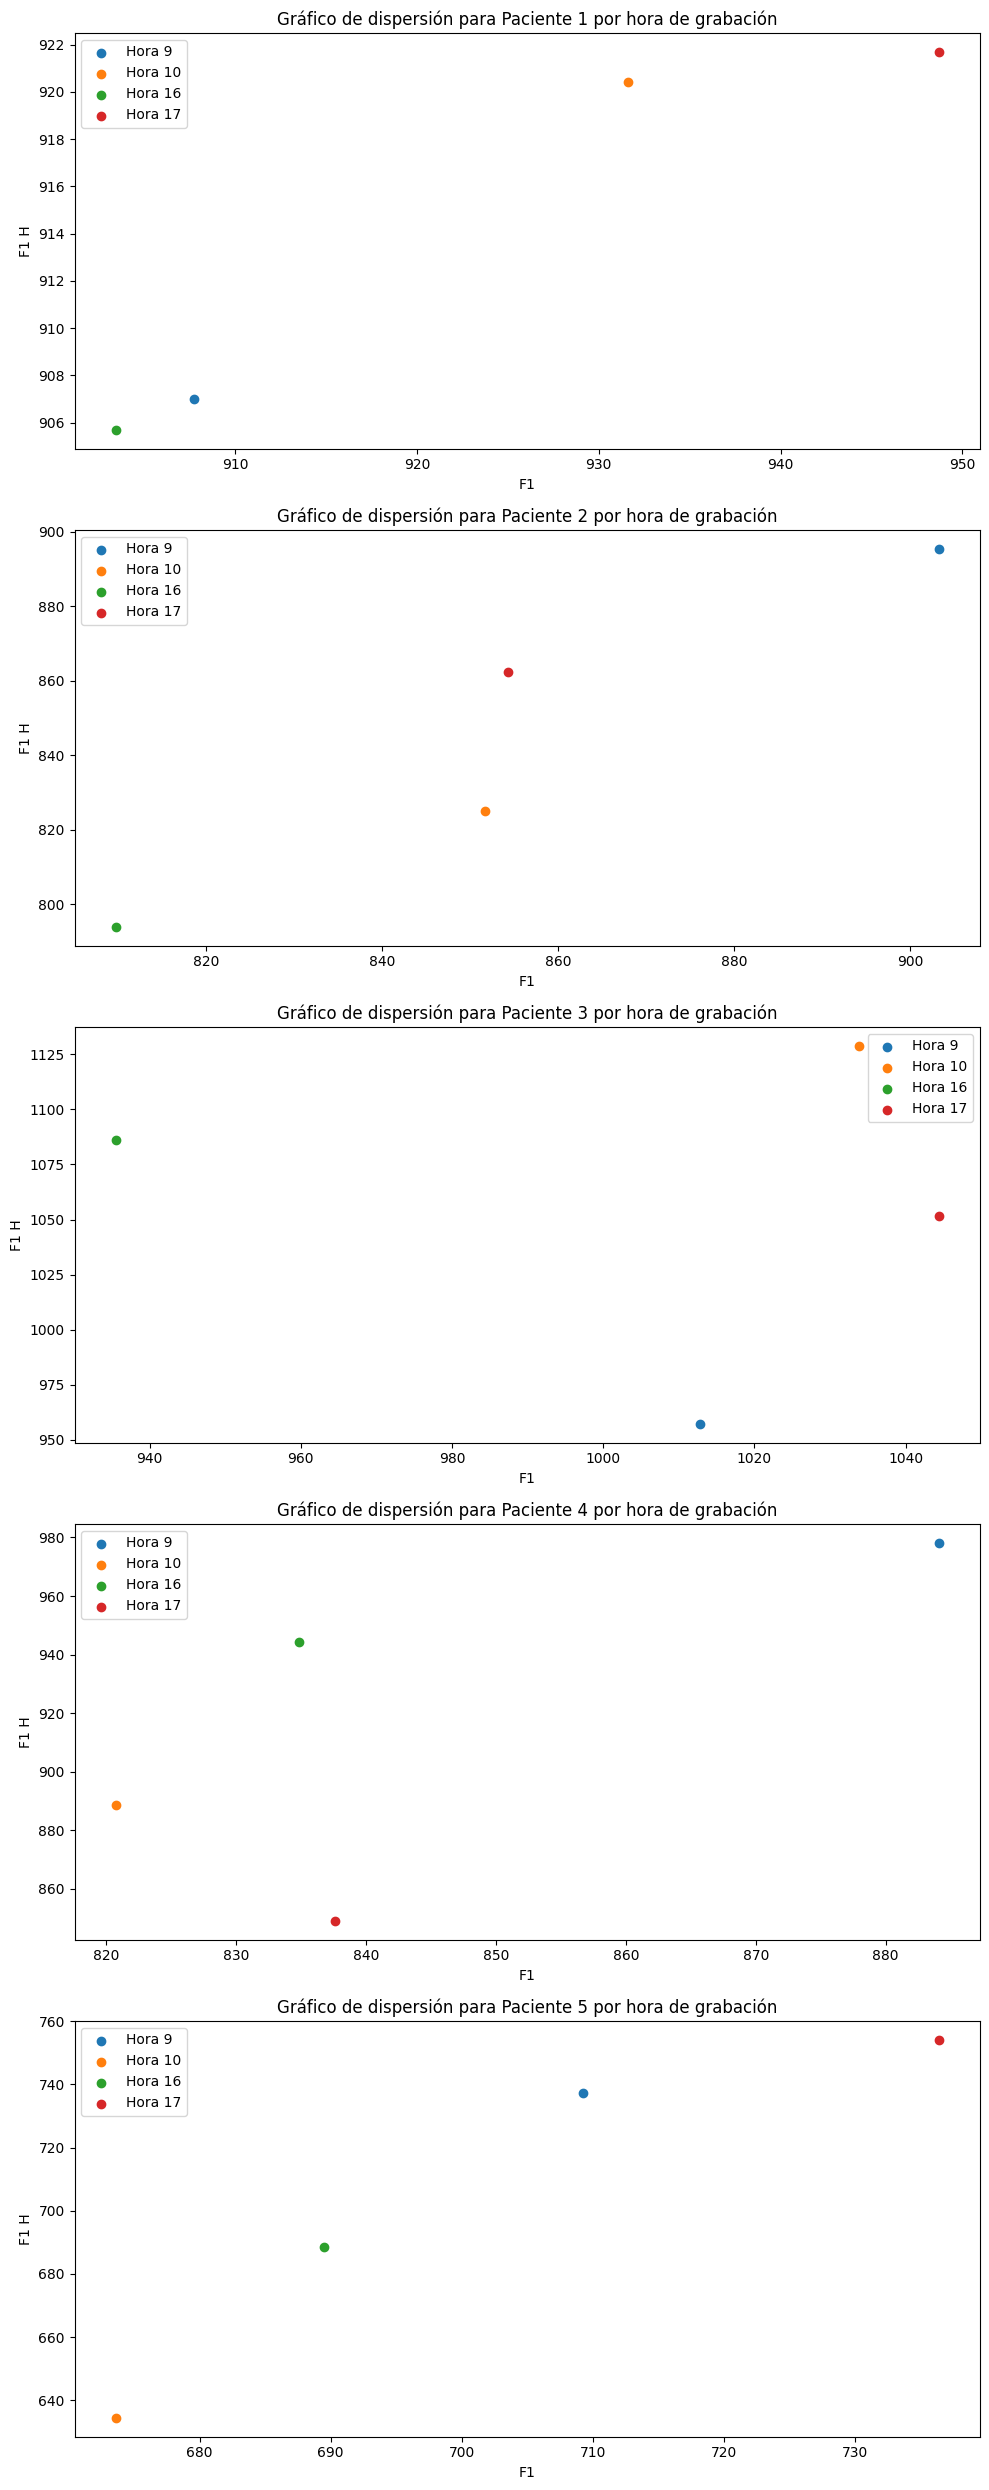

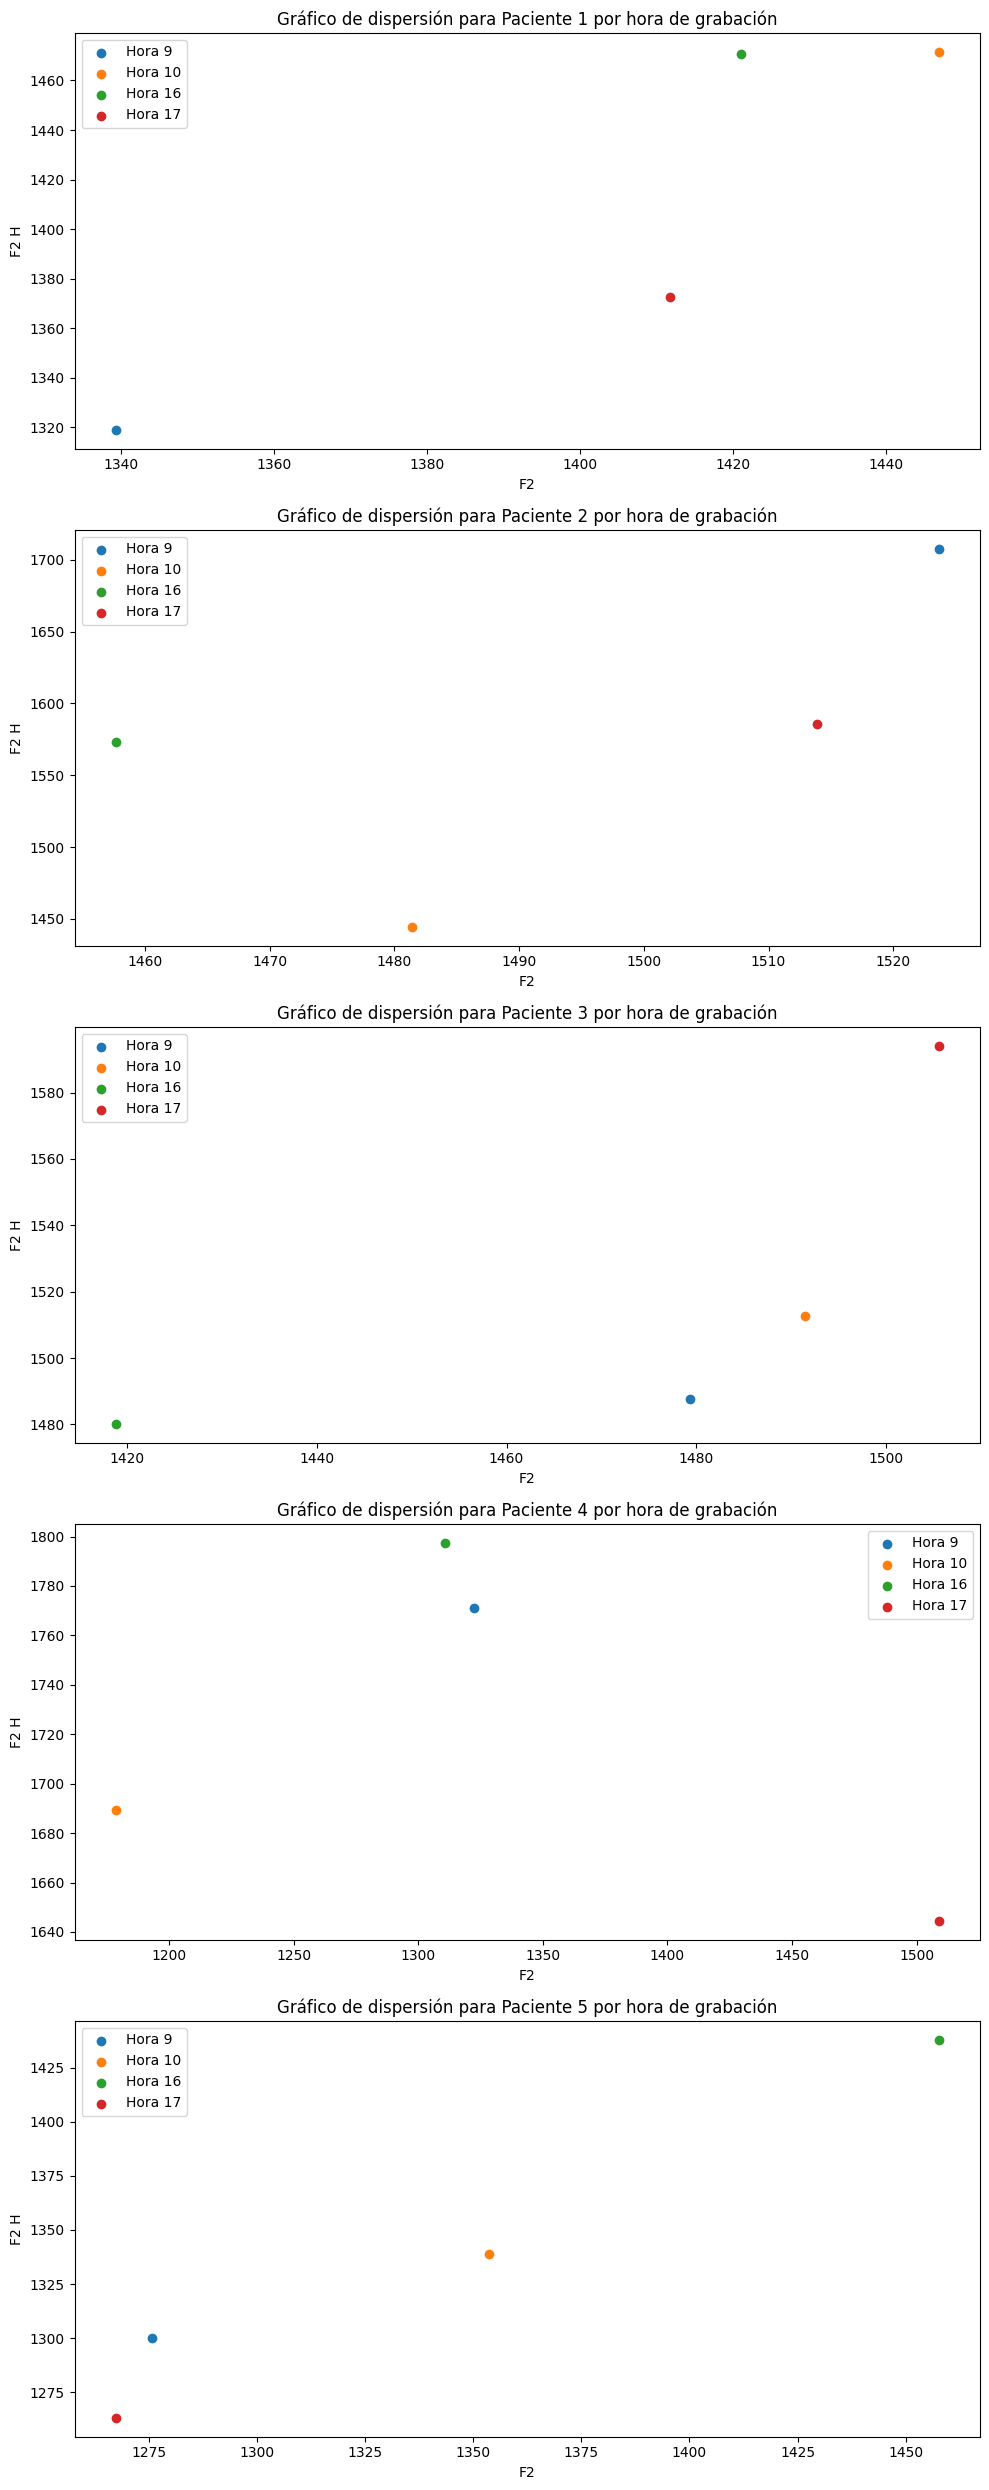

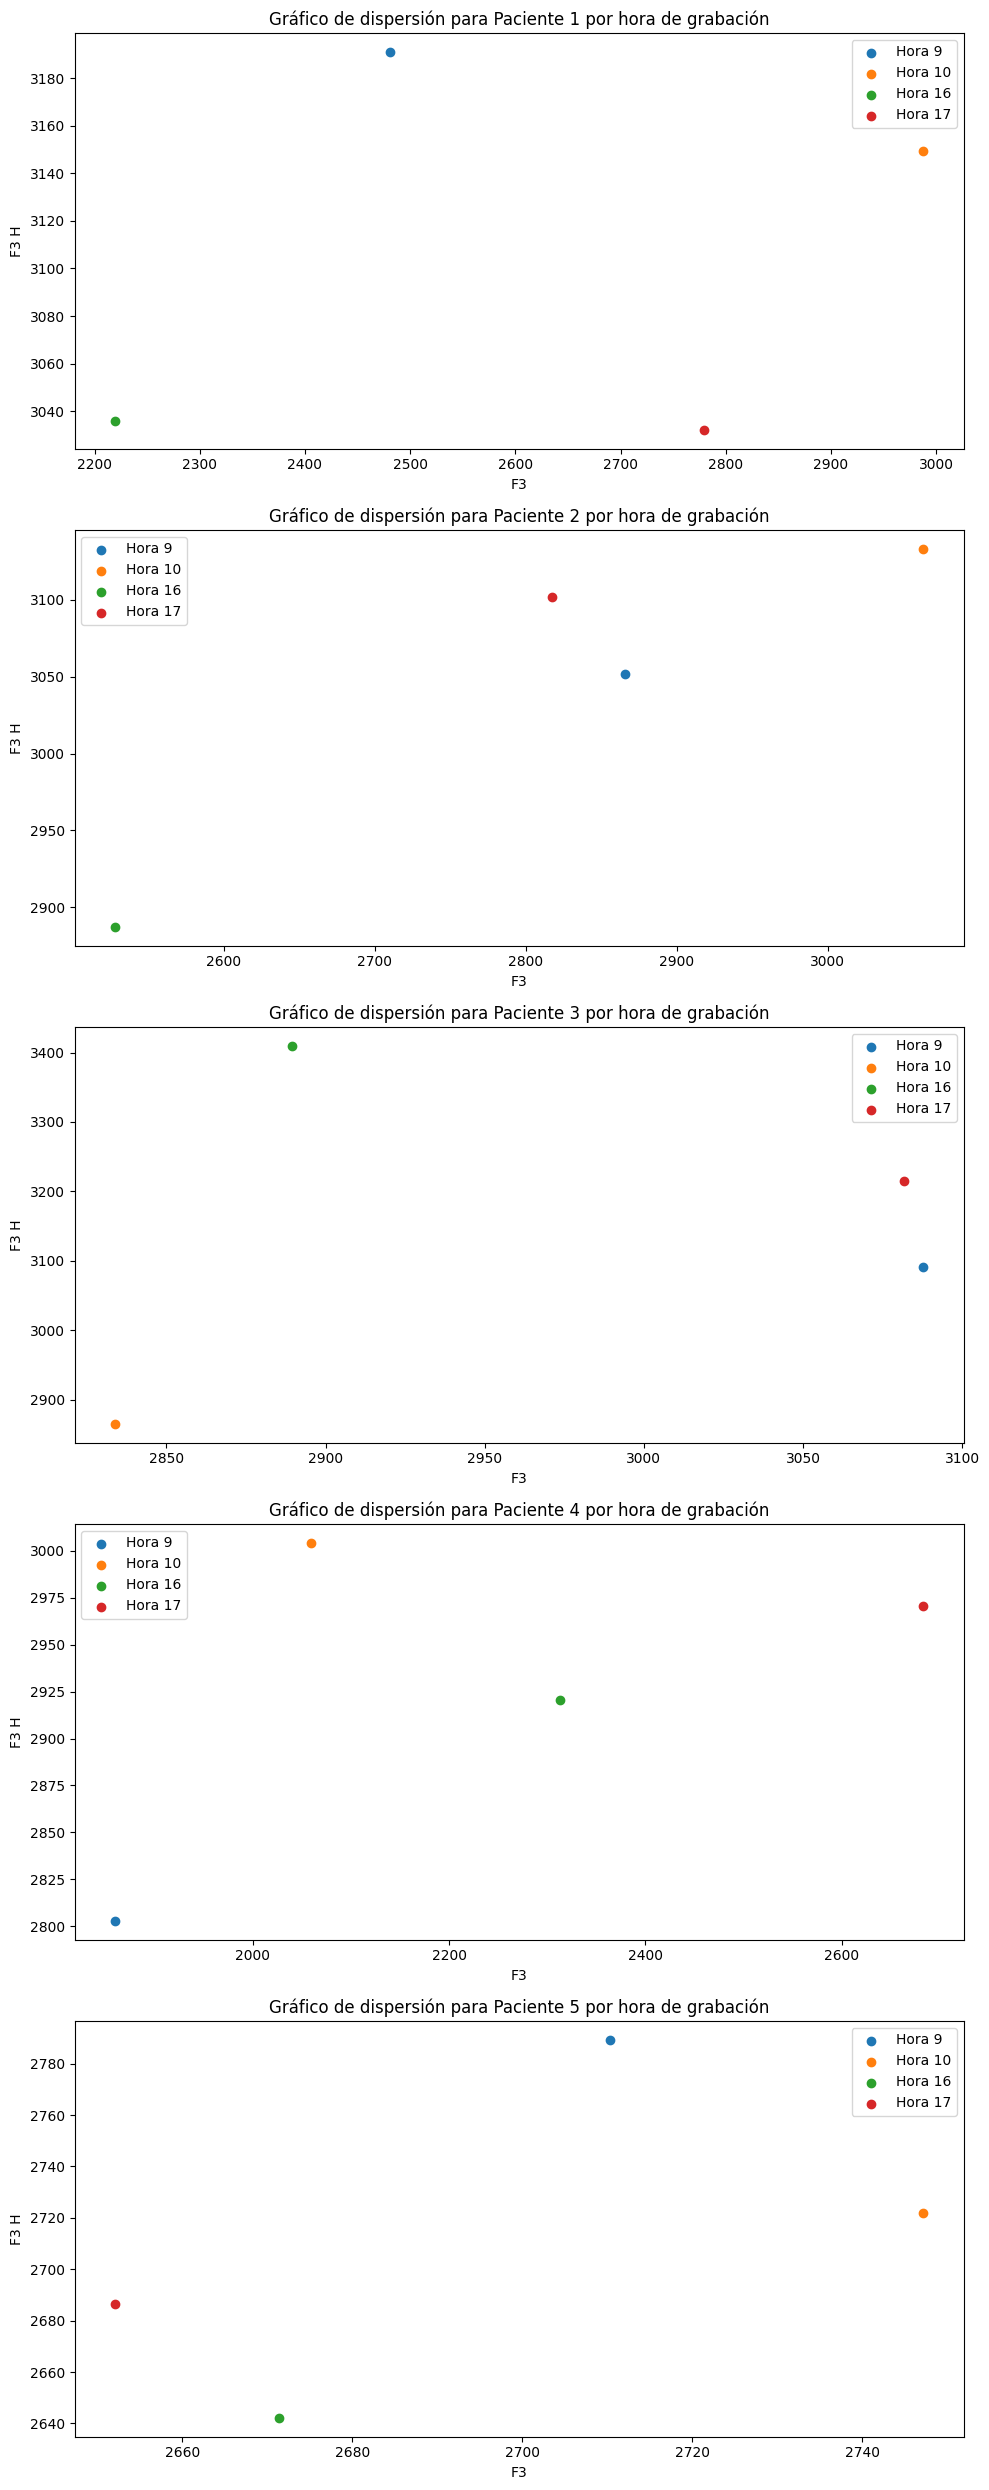

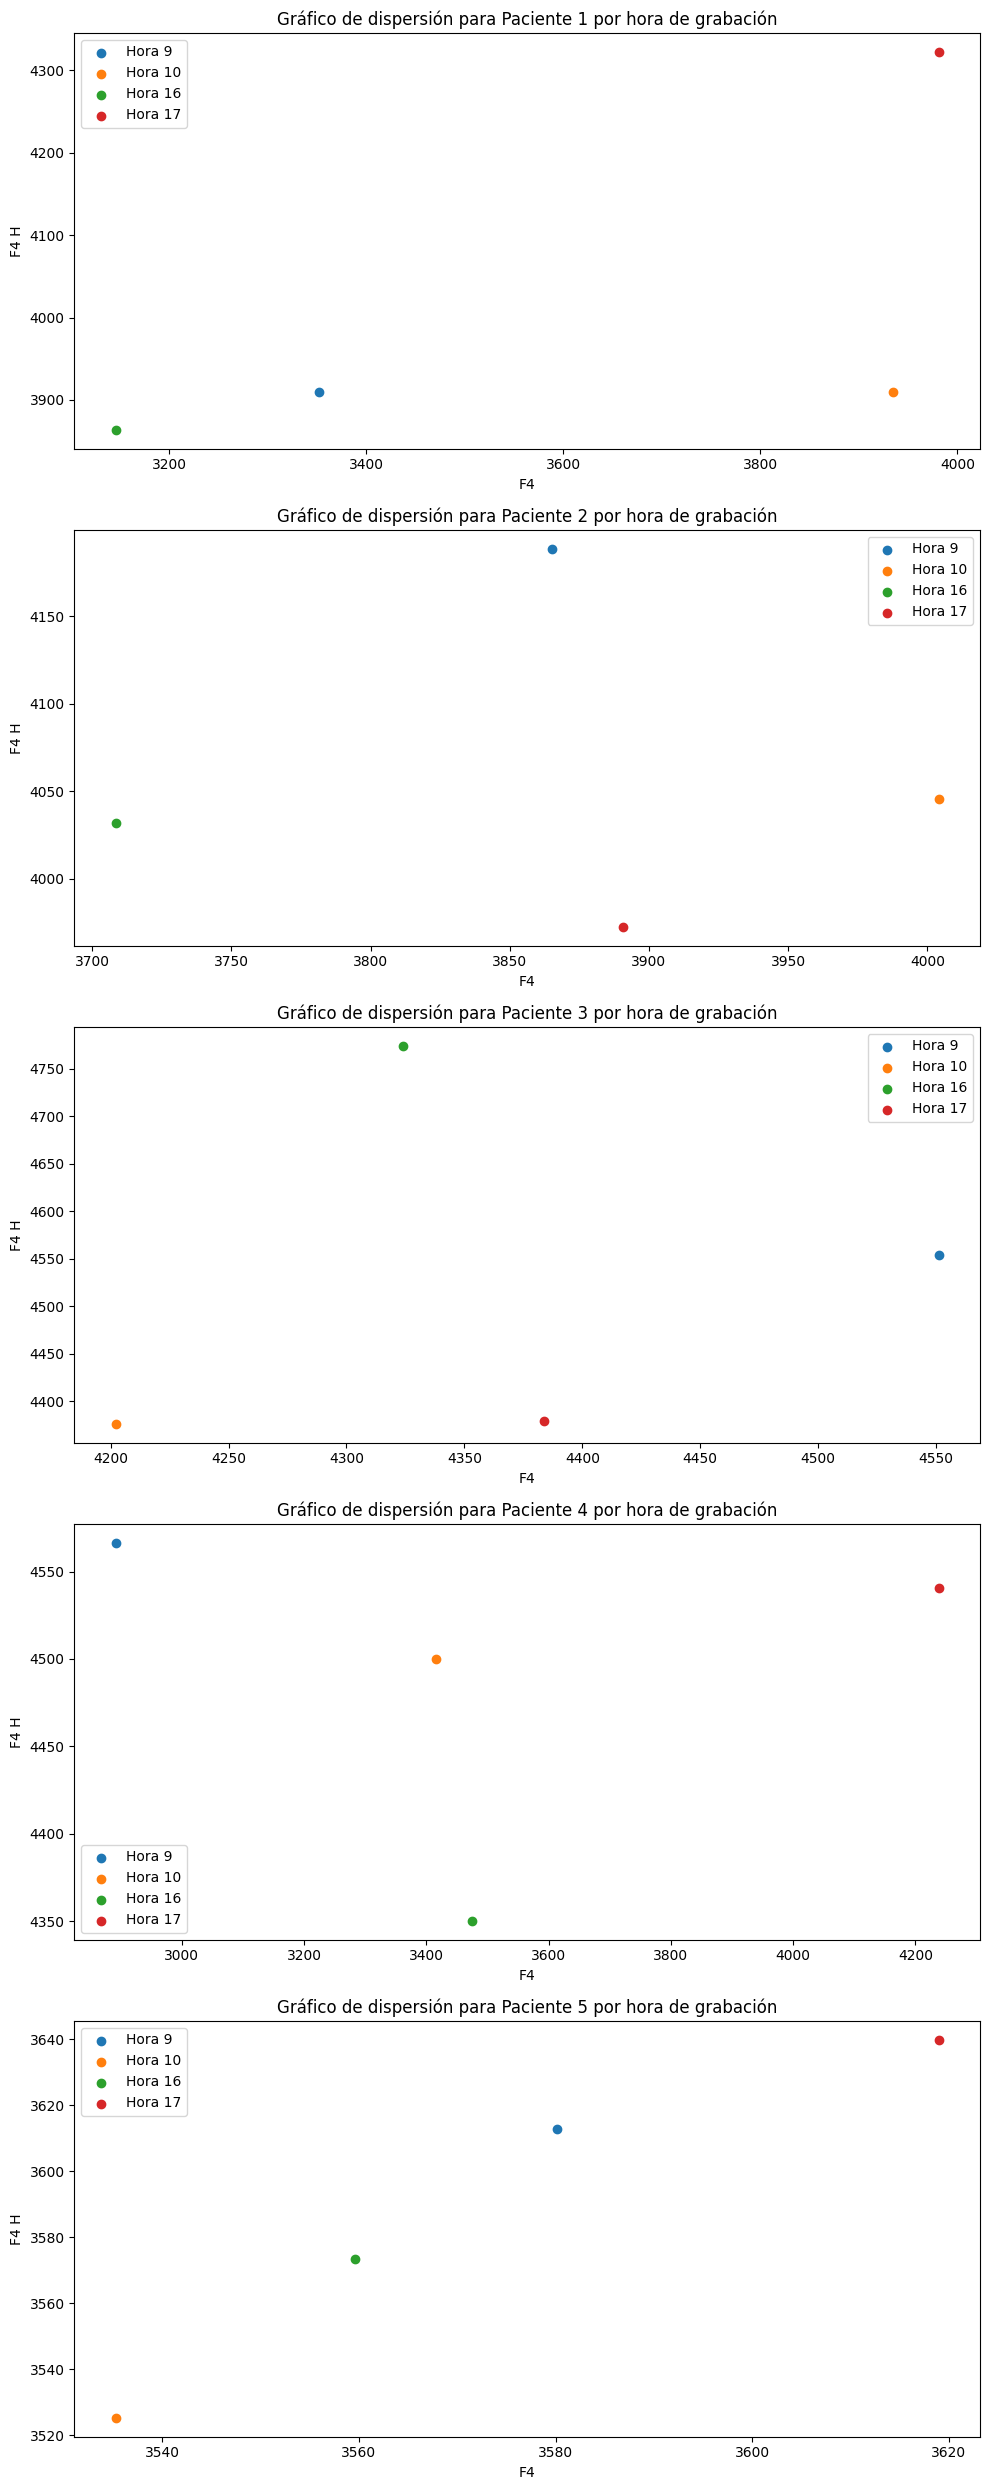

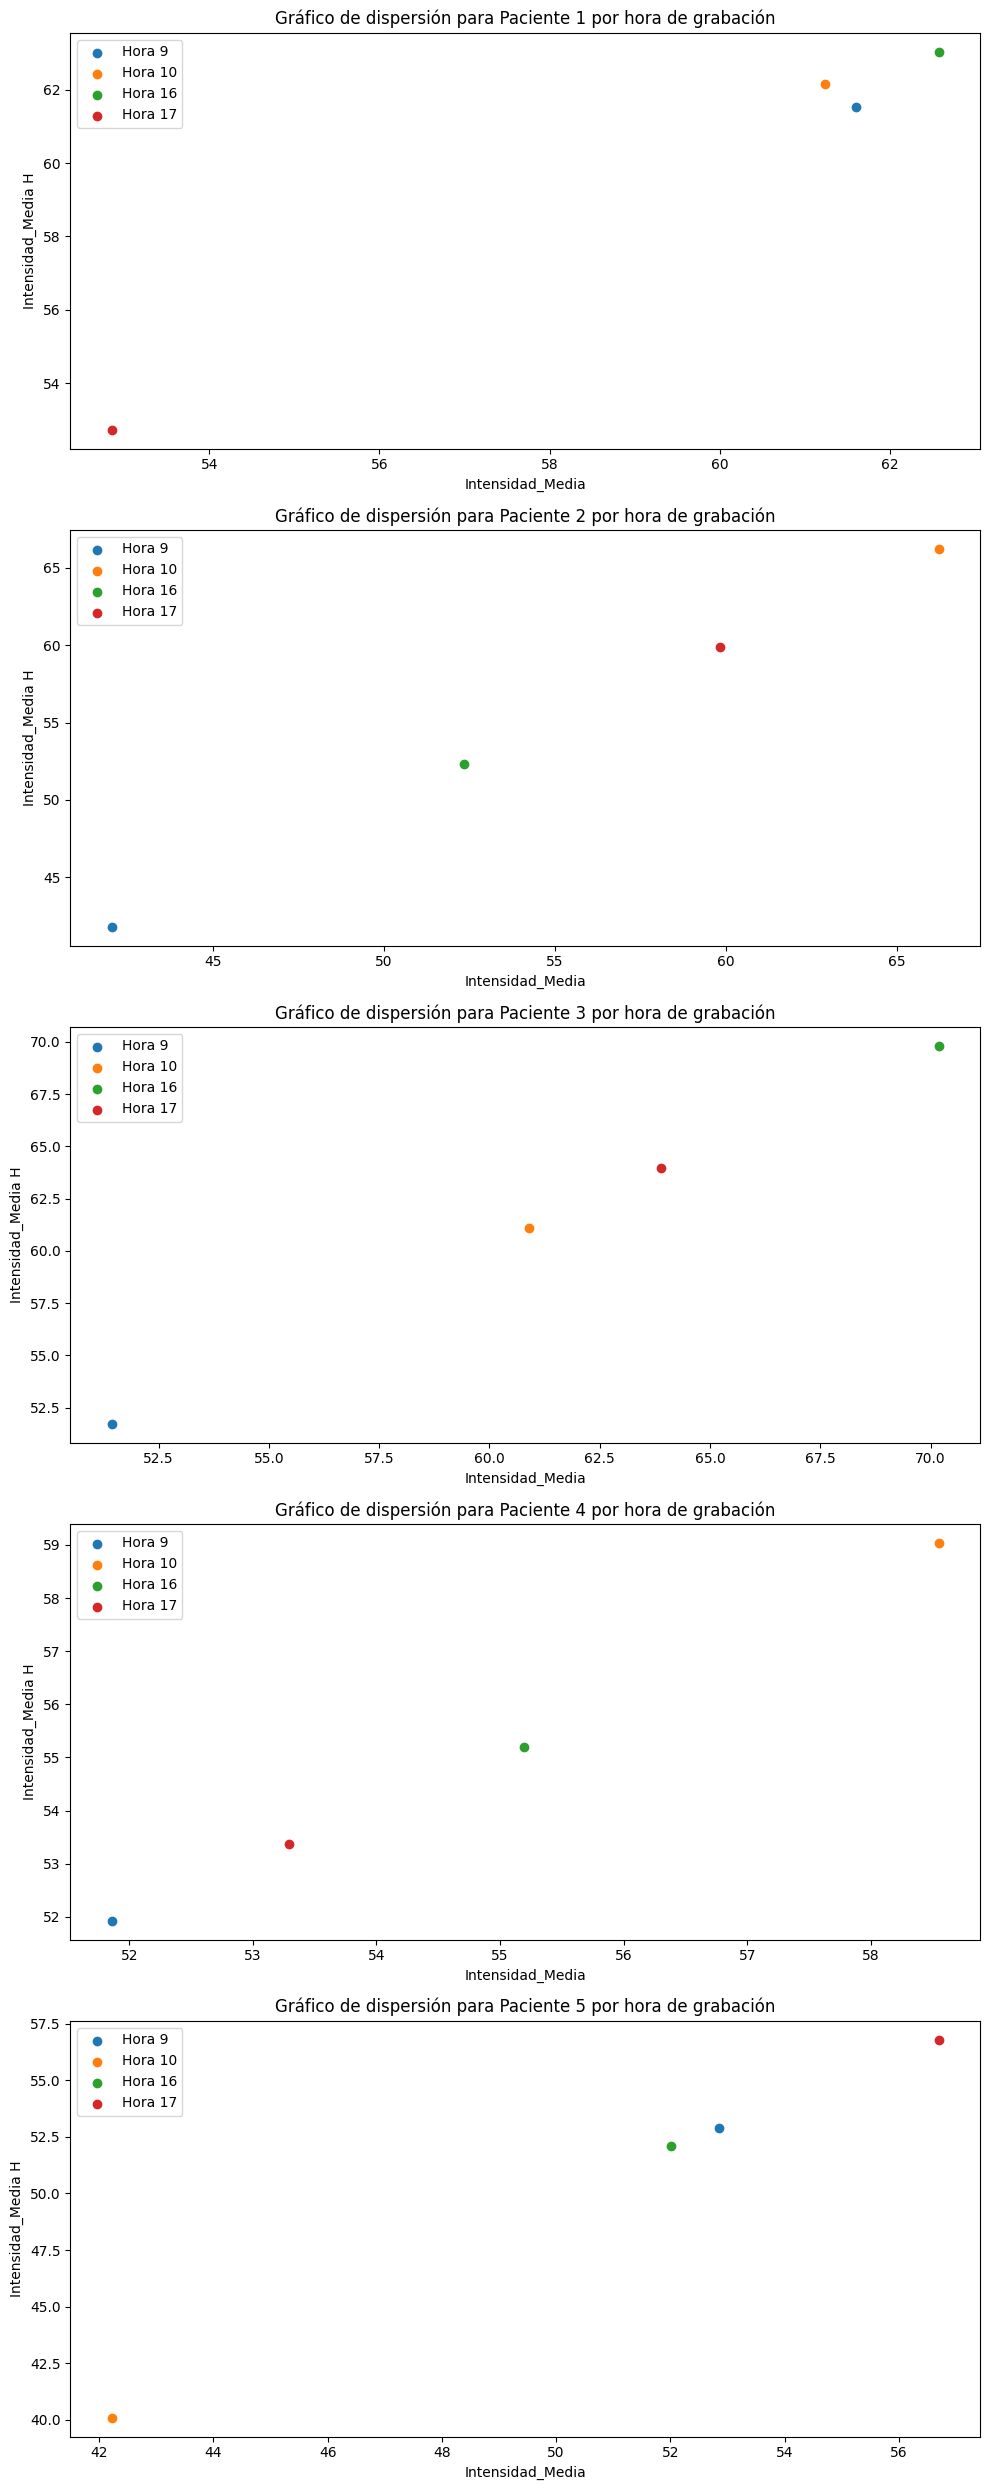

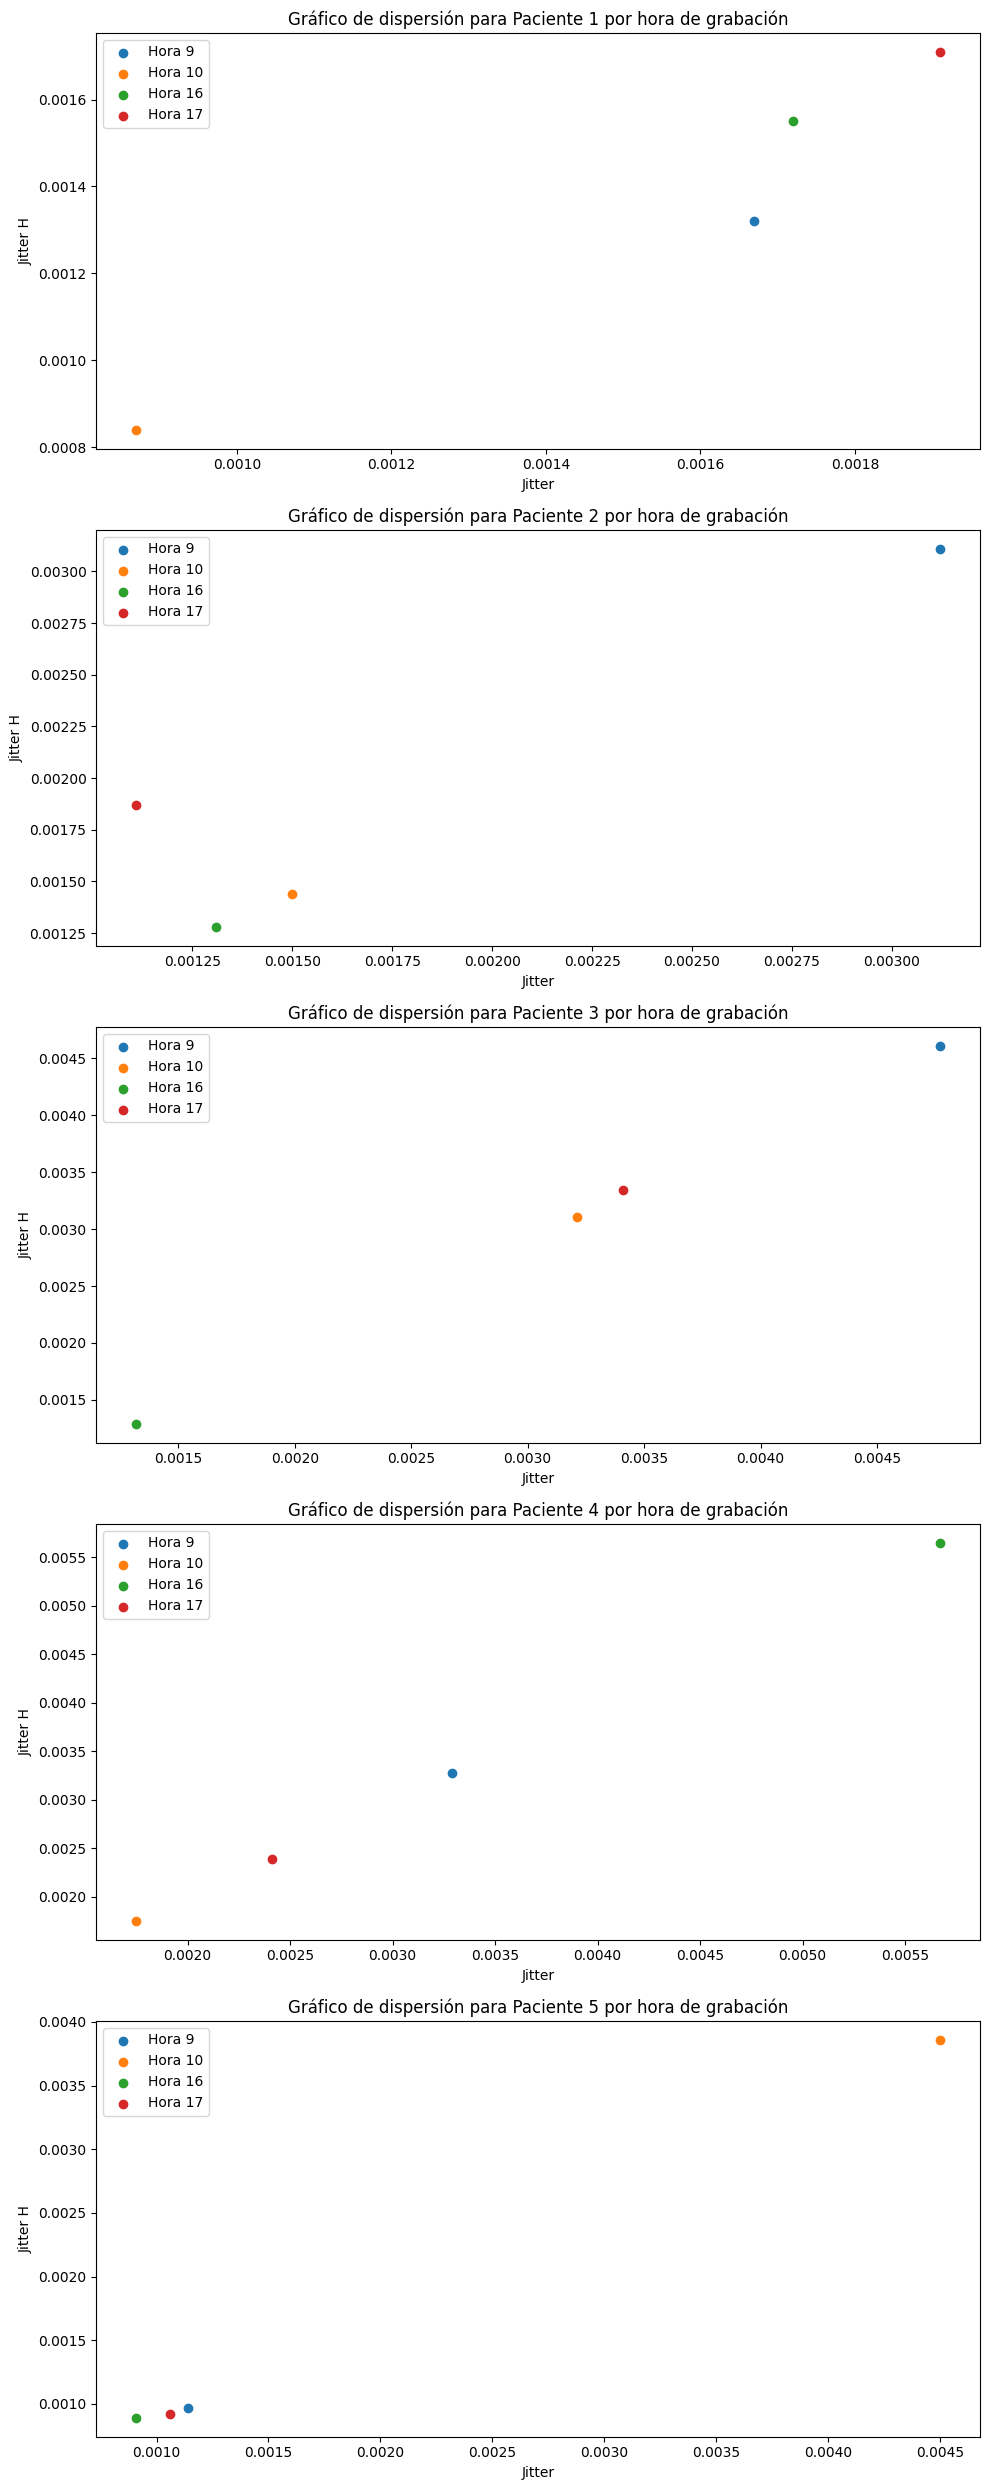

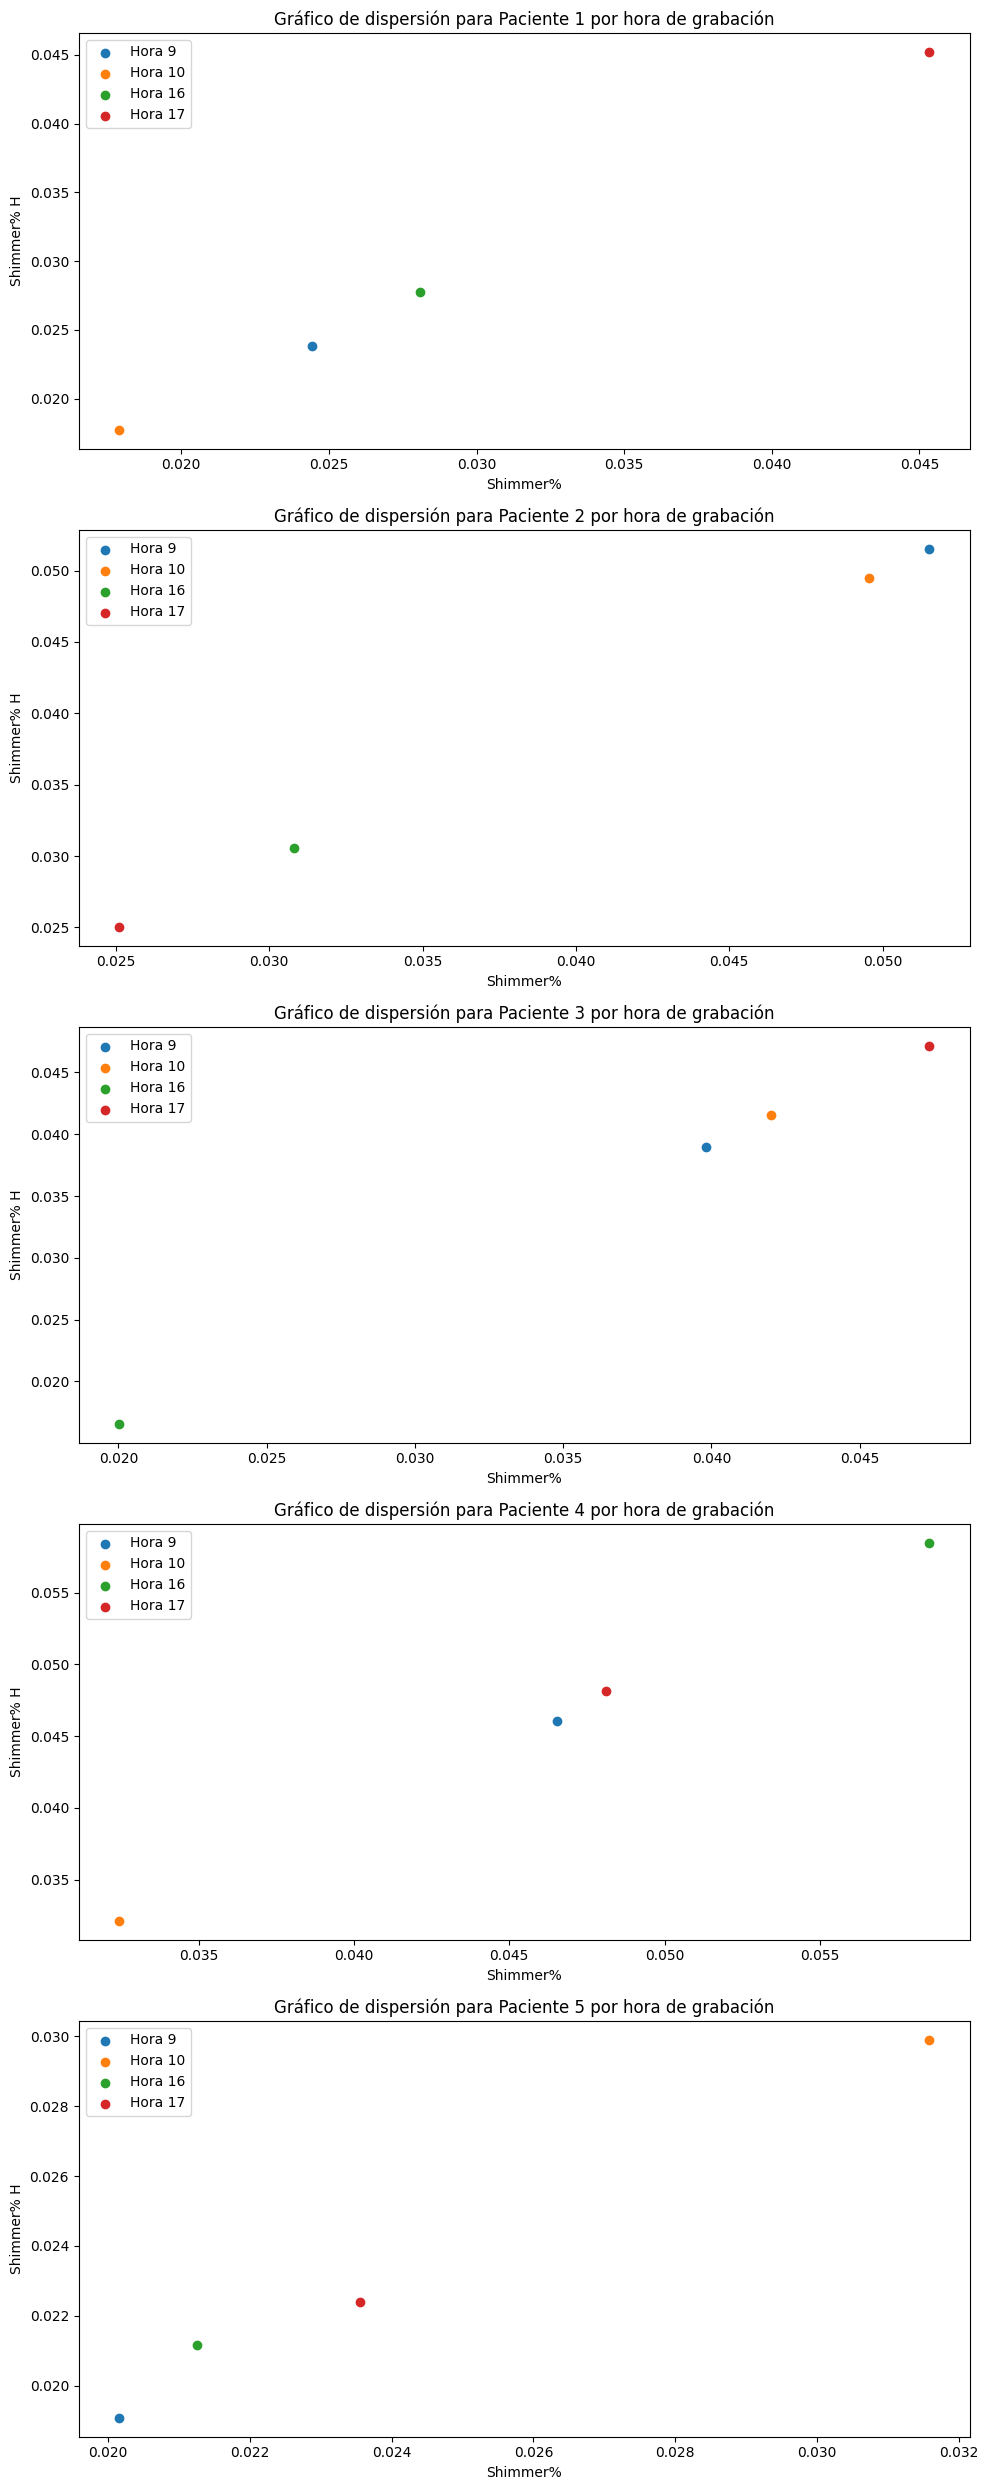

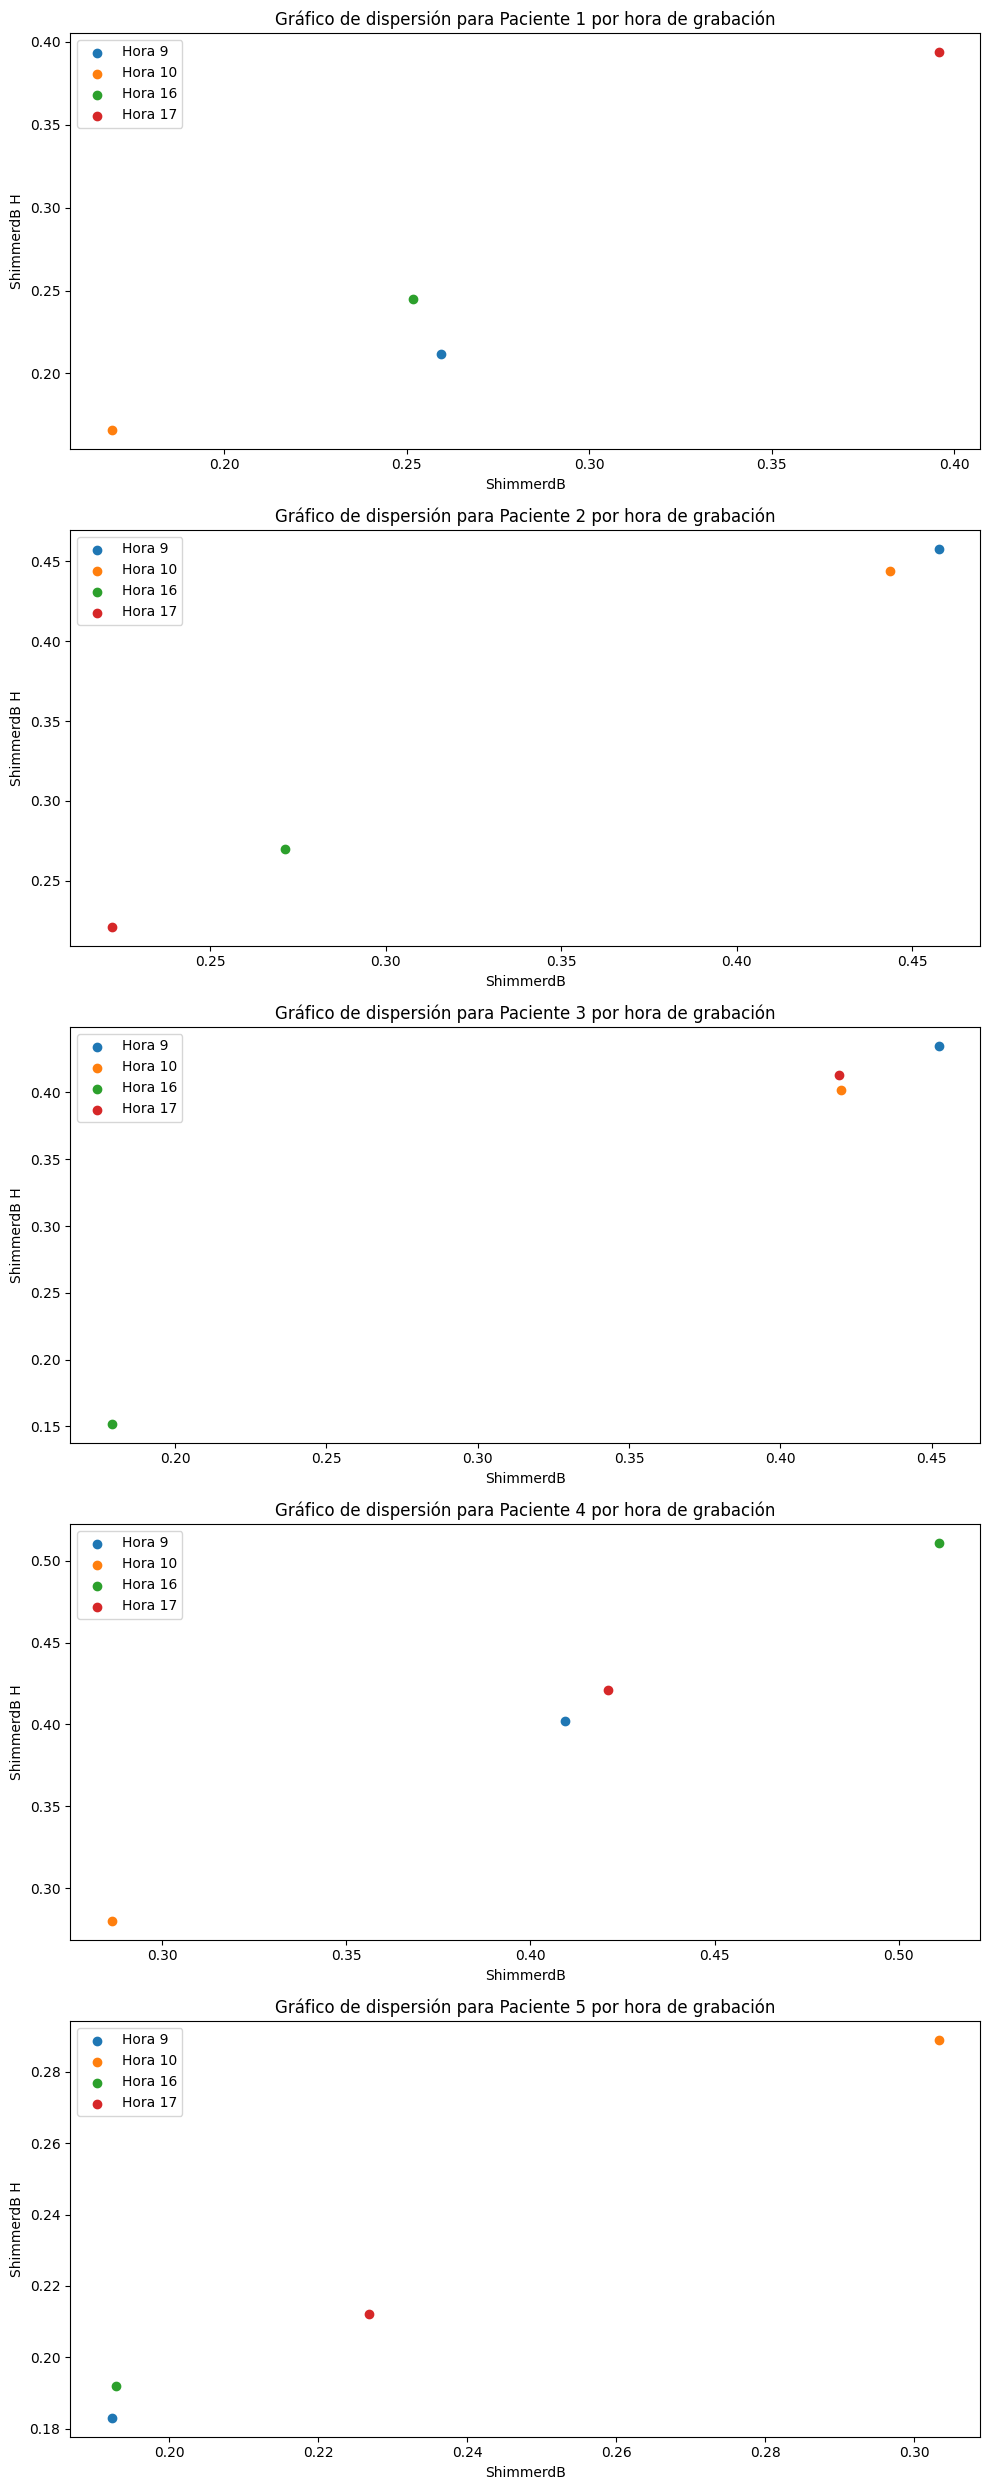

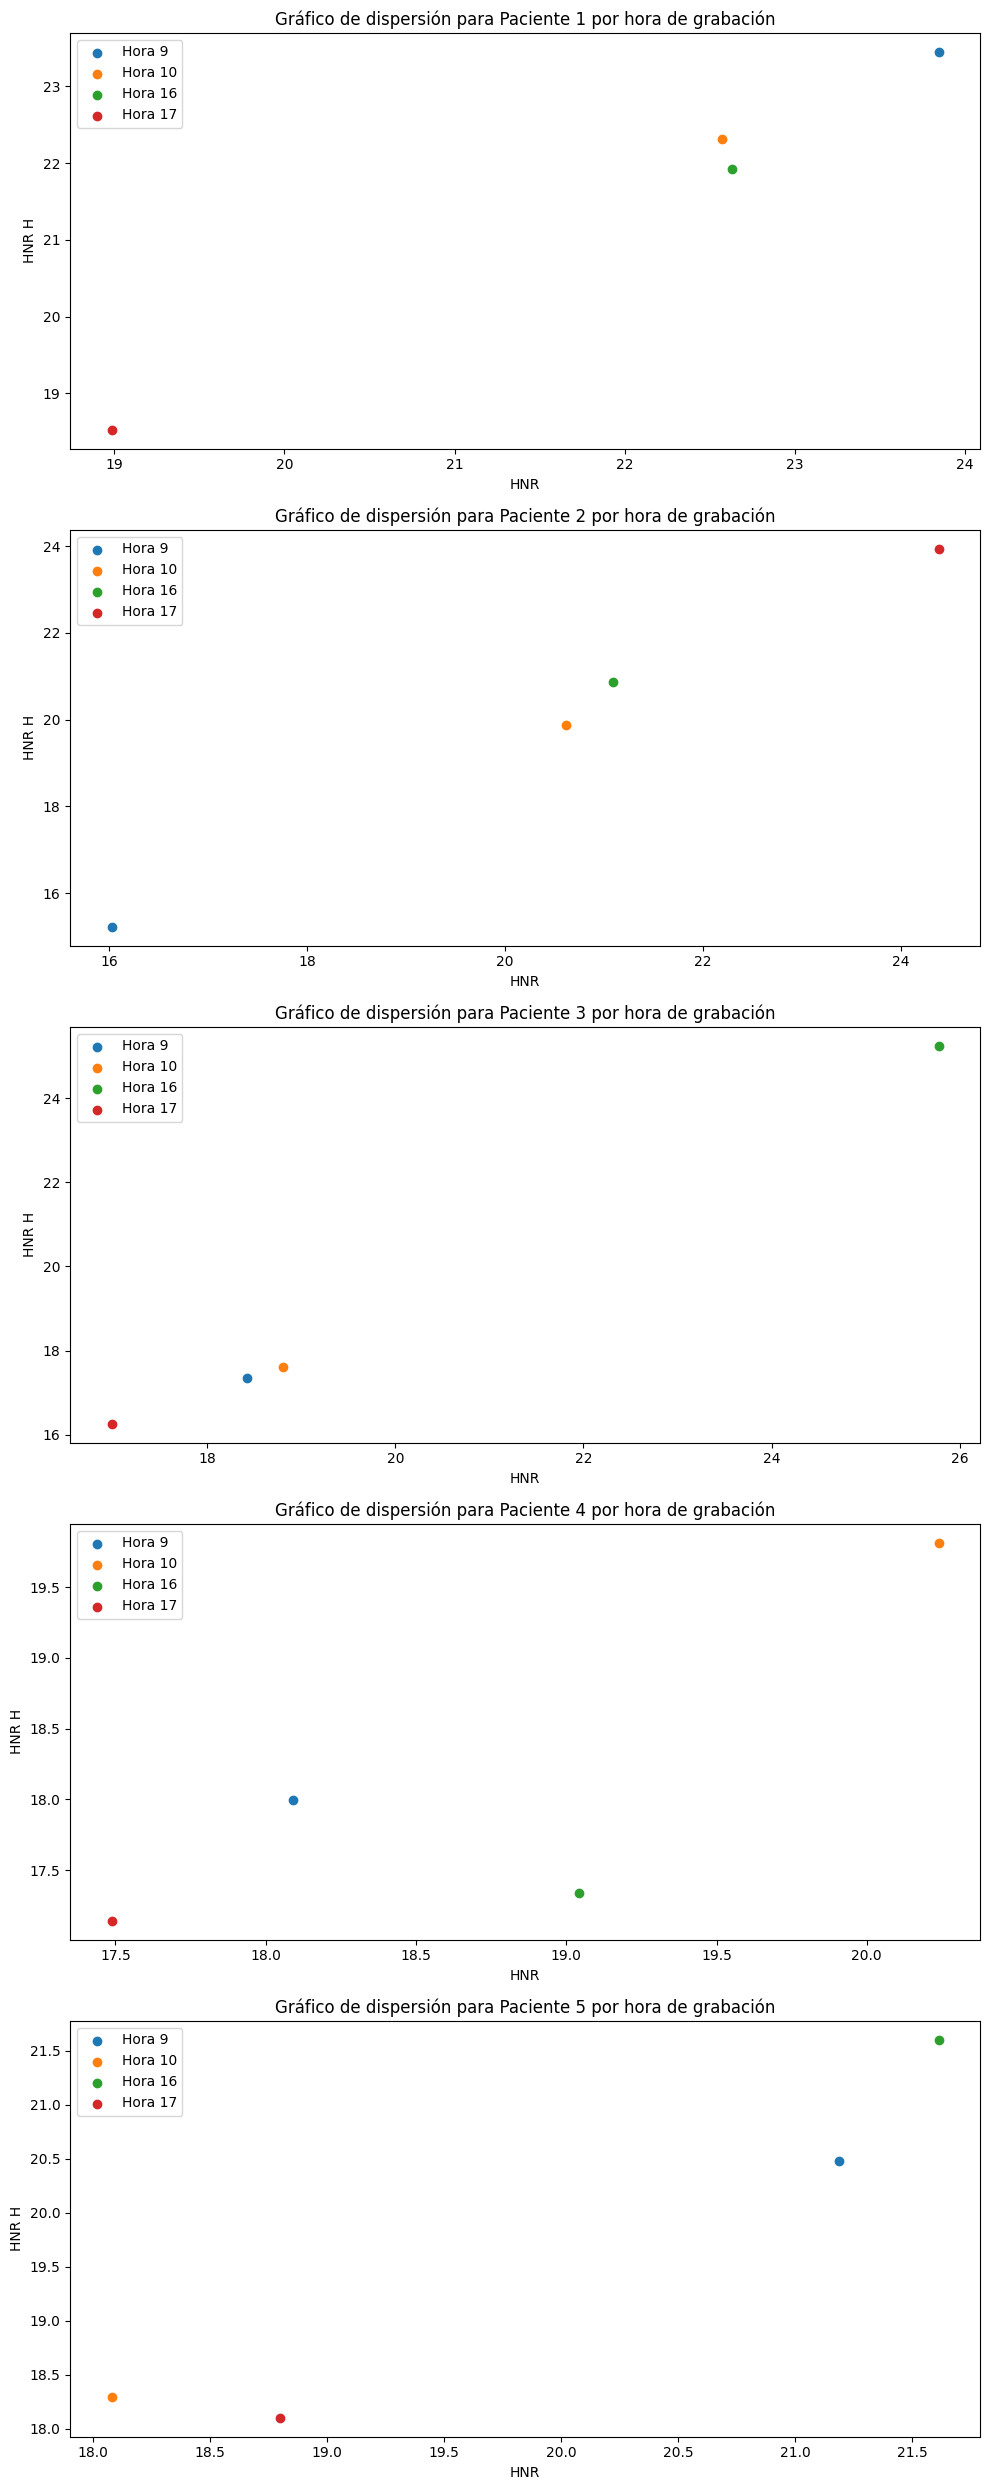

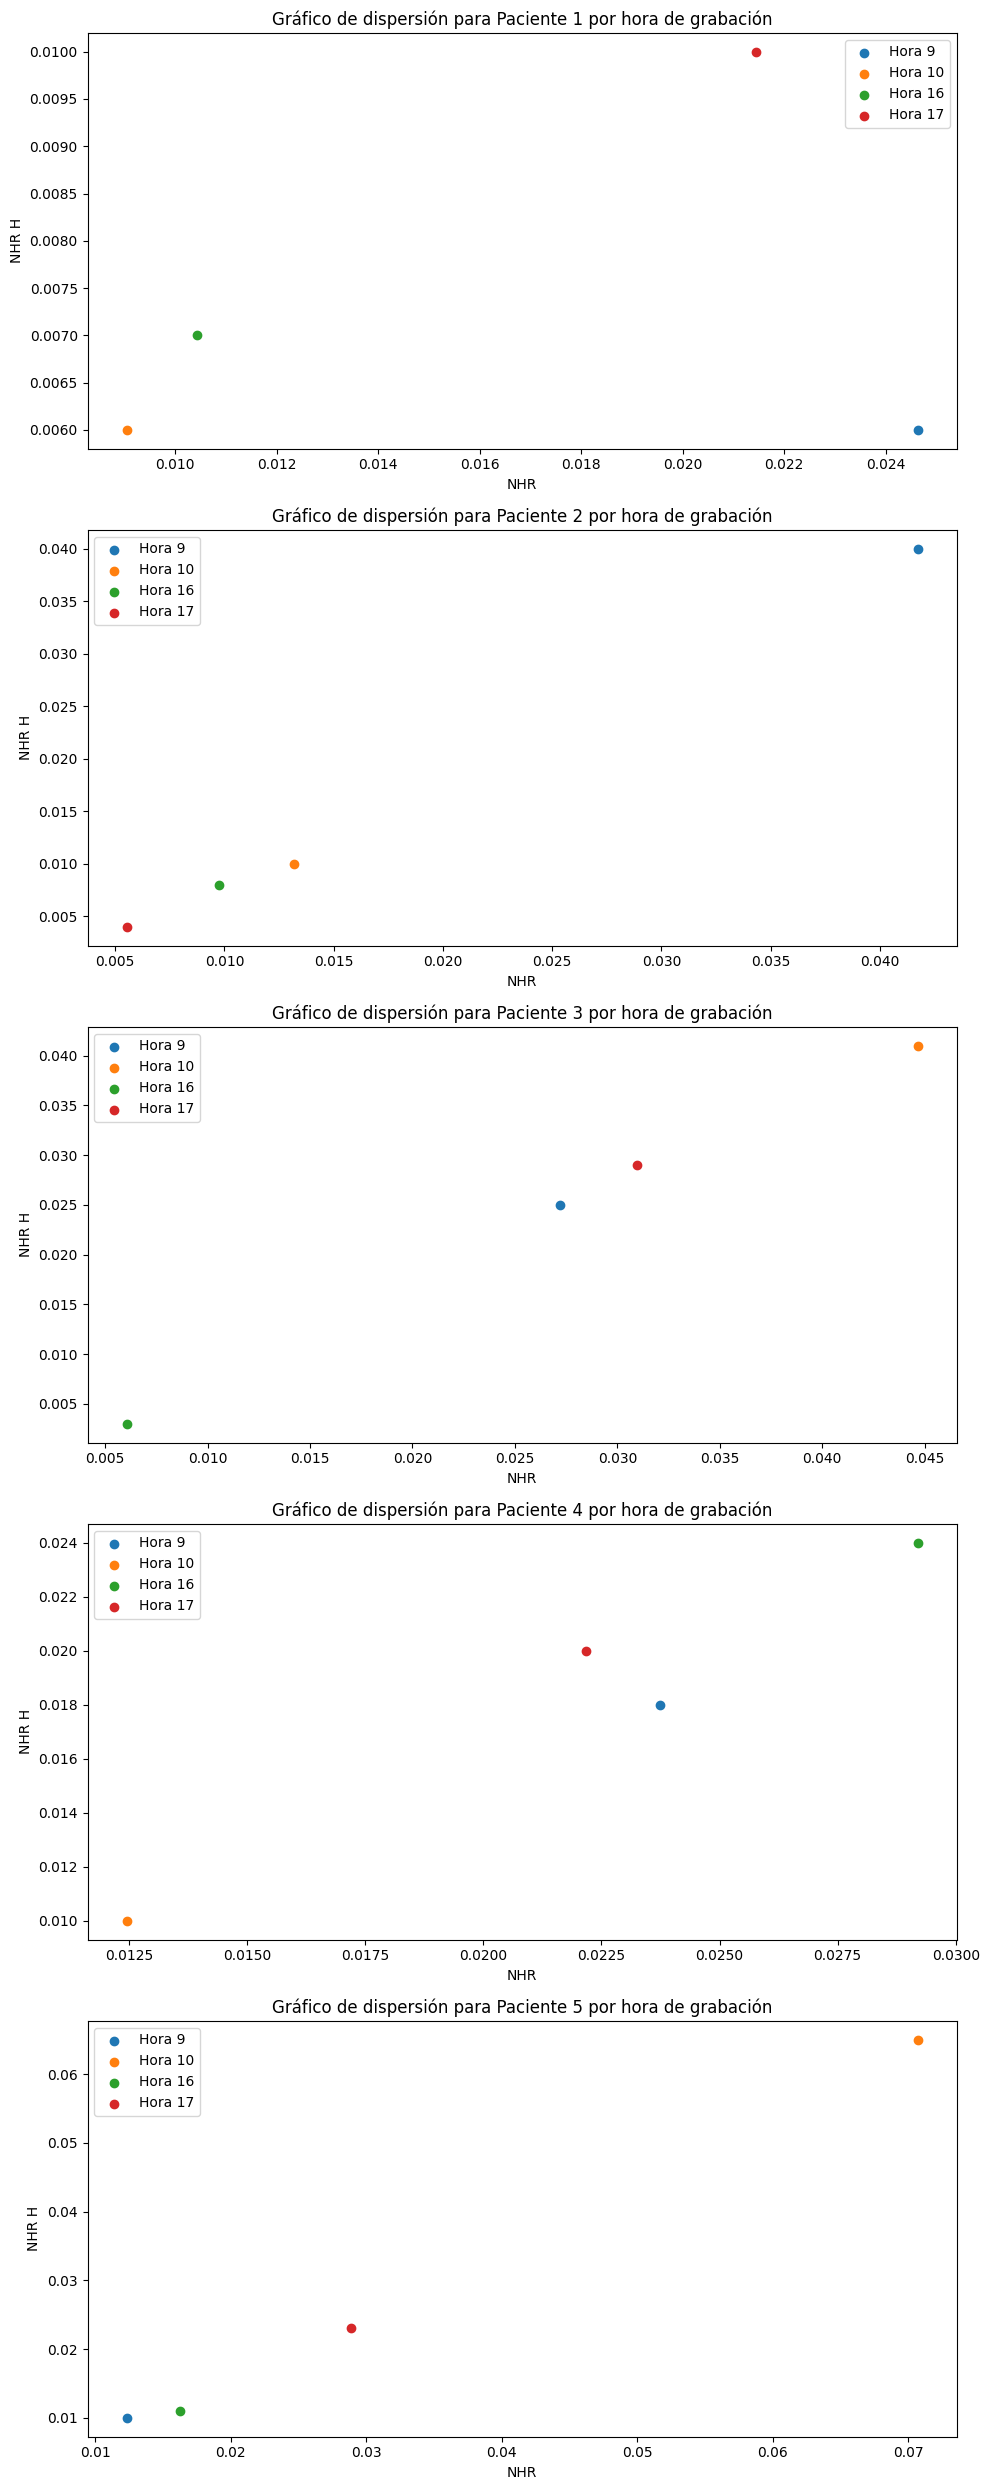

In [8]:
for variable in variables:
    fig, axs = plt.subplots(len(datos['Paciente'].unique()), 1, figsize=(10, 5 * len(datos['Paciente'].unique())))
    
    for i, paciente in enumerate(datos['Paciente'].unique()):
        paciente_datos = datos[datos['Paciente'] == paciente]
        
        ax = axs[i]
        
        for hora in paciente_datos['hora_Audio'].unique():
            hora_datos = paciente_datos[paciente_datos['hora_Audio'] == hora]
            ax.scatter(hora_datos[variable], hora_datos[f'{variable}_H'], label=f'Hora {hora}')
        
        ax.set_xlabel(variable)
        ax.set_ylabel(f'{variable} H')
        
        ax.legend()
        
        ax.set_title(f"Gráfico de dispersión para {paciente} por hora de grabación")

    plt.tight_layout()

    file_name = f'grafico_comparacion_hr_paciente_{variable}_{variable}H.png'
    #file_path = f'graficos/deepnote_analisis/dispersion_hvm_hr_paciente/{file_name}'
    file_path = f'../../media/graficos/deepnote_analisis/dispersion_hvm_hr_paciente/{file_name}'
    
    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')

    plt.show()

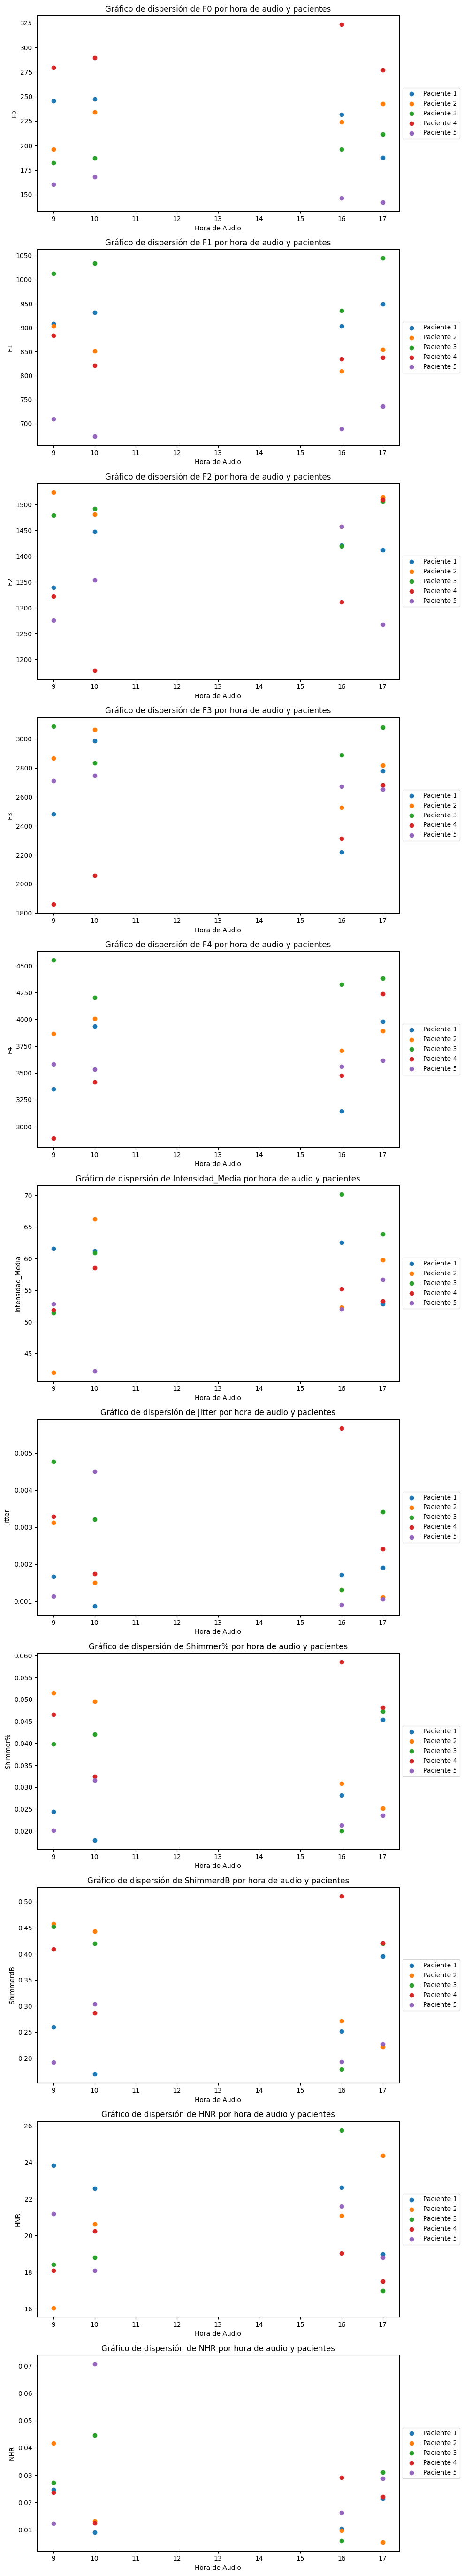

In [9]:
fig, axs = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)))

for i, variable in enumerate(variables):
    ax = axs[i]
    
    for paciente in datos['Paciente'].unique():
        paciente_datos = datos[datos['Paciente'] == paciente]
        
        ax.scatter(paciente_datos['hora_Audio'], paciente_datos[variable], label=f'{paciente}')

    ax.set_xlabel('Hora de Audio')
    ax.set_ylabel(variable)
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(f"Gráfico de dispersión de {variable} por hora de audio y pacientes")

plt.tight_layout()

file_name = f'grafico_variacion_m_hora_{variable}_{variable}H.png'
#file_path = f'graficos/deepnote_analisis/variacion_m_hora/{file_name}'
file_path = f'../../media/graficos/deepnote_analisis/variacion_m_hora/{file_name}'

# Save the plot
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()